## Resumen

Este trabajo abordó el **análisis y la explicabilidad** de un modelo de IA enfocado en la salud mental en el sector tecnológico. Para ello, se empleó el dataset *Mental Health in Tech Survey* (1259 registros, 27 variables), que incluye información sobre factores como historial familiar, interferencia en el trabajo, beneficios de la empresa, género o edad, y su relación con la búsqueda o recepción de tratamiento (variable `treatment`).

Tras una fase de **limpieza y Exploración de Datos (EDA)**, en la que se unificaron categorías de género, se ajustaron valores atípicos de edad y se examinaron distribuciones y correlaciones clave, se definieron dos modelos predictivos: un **árbol de decisión** (modelo interpretable) y **XGBoost** (modelo más complejo). Para profundizar en la interpretación de sus predicciones, se aplicaron técnicas de **Explicabilidad en IA** (XAI), concretamente **SHAP** y **LIME**, que identifican las variables de mayor impacto tanto a nivel global como en casos individuales.

El modelo XGBoost alcanzó un AUC de 0,82 y una precisión (*accuracy*) de 0,78, demostrando su solidez predictiva. Estos resultados muestran cómo la **Explicabilidad** facilita decisiones informadas y genera confianza en un contexto tan delicado como la salud mental, evidenciando qué factores —como `work_interfere` y `family_history`— explican y justifican las predicciones del modelo.

# 1. Introducción

La **inteligencia artificial (IA)** se ha convertido en una herramienta clave en la atención sanitaria, con un impacto creciente en la toma de decisiones clínicas, la personalización de tratamientos y la gestión de grandes volúmenes de datos de pacientes. Sin embargo, a medida que los modelos de IA —por ejemplo, redes neuronales profundas o ensembles complejos— ganan en precisión y complejidad, surge el problema de la **opacidad**: resulta difícil comprender cómo se generan las predicciones y qué factores se tienen en cuenta. Este reto se agrava en entornos especialmente sensibles, como la **salud mental**.

Precisamente, la **Explicabilidad en IA (XAI, eXplainable AI)** ofrece soluciones a dicha problemática. Tal como señalan Aziz et al. (2024) y Adeniran et al. (2024), la explicabilidad es fundamental para generar confianza en los diagnósticos y recomendaciones automatizadas, cumplir con regulaciones (p. ej., GDPR en Europa, FDA en Estados Unidos) y asegurar la ética y transparencia en el manejo de información clínica.

A continuación, este bloque presenta el marco teórico necesario para comprender la motivación y los conceptos centrales de XAI en el ámbito de la salud mental.

---

## 1.1 Contexto y motivación

En el ámbito de la salud mental, los datos suelen provenir de fuentes muy heterogéneas: formularios autoinformados, historiales clínicos incompletos y aspectos contextuales (p. ej., entorno laboral, factores de estrés). El dataset *Mental Health in Tech Survey* es un claro ejemplo de esta complejidad: recopila información de empleados en empresas tecnológicas sobre su bienestar mental, la cultura de la compañía y si han buscado o recibido ayuda.  

Aplicar IA en este entorno **sin** un componente de explicabilidad puede dar lugar a “cajas negras” en las que se desconoce la lógica detrás de diagnósticos o recomendaciones. Dado lo delicado del tema (por la posible aparición de sesgos relacionados con género, país, edad, etc.), es imprescindible entender cómo un modelo llega a sus conclusiones.

Por ello, en este proyecto:
- Exploramos la **Explicabilidad en IA** (XAI) como área central de *data science* aplicada a la salud mental.  
- Aplicamos técnicas específicas (p. ej., **SHAP**, **LIME**, árboles de decisión interpretables) sobre un **dataset real** de salud mental, con el fin de demostrar cómo la explicabilidad potencia la **transparencia** y la **confianza** en las predicciones.

---

## 1.2 Objetivos del bloque

En este bloque se establecieron los objetivos teóricos para:
- Definir los conceptos clave de **interpretabilidad** y **explicabilidad**, y su vínculo con la mitigación de sesgos y el cumplimiento legal.  
- Revisar estudios recientes sobre XAI en entornos clínicos (Aziz et al., 2024; Adeniran et al., 2024).  
- Describir las herramientas de XAI más utilizadas en Python (SHAP, LIME, Grad-CAM) y su aplicabilidad a datos tabulares.

---

## 1.3 Índice de contenido

Este notebook se organiza en seis bloques principales:

1. **Introducción y Estado del Arte**  
   - Contexto, motivación y revisión de trabajos clave (Aziz et al., 2024; Adeniran et al., 2024).  

2. **Revisión teórica y conceptual sobre XAI**  
   - Definición de interpretabilidad vs. explicabilidad.  
   - Métodos intrínsecos y post-hoc.  
   - Retos y limitaciones en salud mental.  

3. **Análisis Exploratorio de Datos (EDA)**  
   - Carga del dataset, limpieza y tratamiento de inconsistencias.  
   - Estadísticas descriptivas, visualizaciones y correlaciones.  

4. **Definición de la Prueba de Concepto**  
   - Objetivos específicos.  
   - Variables de interés y hipótesis a verificar.  

5. **Implementación experimental**  
   - Construcción de modelos predictivos (árbol de decisión, XGBoost).  
   - Aplicación de XAI (SHAP y LIME) para explicaciones globales y locales.  
   - Comparativa de resultados y justificación de elecciones.  

6. **Conclusiones y siguientes pasos**  
   - Discusión de hallazgos.  
   - Limitaciones y propuestas de mejora.  
   - Referencias bibliográficas finales.  


---

## 1.4 Estado del Arte

Aunque la IA se ha incorporado con éxito a distintos ámbitos sanitarios (Topol, 2019; Esteva et al., 2019), en salud mental persisten desafíos **éticos y metodológicos** que resaltan la relevancia de la **explicabilidad** (Adeniran et al., 2024; Aziz et al., 2024). Diversos autores indican que la falta de transparencia en los sistemas inteligentes genera desconfianza en personal médico y pacientes, especialmente cuando las decisiones pueden afectar un diagnóstico o un tratamiento (Caruana et al., 2015; Gunning, 2017).

Se han propuesto dos grandes familias de métodos XAI:
- **Modelos intrínsecamente interpretables** (árboles de decisión, sistemas de reglas, modelos lineales) que facilitan la trazabilidad de las decisiones (Molnar, 2022).  
- **Métodos post-hoc** (LIME, SHAP, Grad-CAM) que explican un modelo ya entrenado, aproximando sus predicciones de forma local o asignando relevancia a las variables (Ribeiro et al., 2016; Lundberg & Lee, 2017).

En salud mental, investigaciones como Antoniadi et al. (2021) y Loh et al. (2022) demuestran que el uso de XAI aumenta la confianza de los profesionales al permitirles **cuestionar** y **verificar** las razones detrás de las predicciones. Además, la XAI es esencial para alinearse con regulaciones que exigen claridad en decisiones automatizadas (p. ej., GDPR).

Estos elementos proporcionan la base teórica necesaria para abordar el EDA y la implementación práctica que se detallarán en los siguientes bloques.  



# 2. Revisión teórica y conceptual sobre XAI

La **explicabilidad en Inteligencia Artificial (XAI)** se ha convertido en un área clave de investigación, especialmente en el ámbito de la salud. Como señalan Aziz et al. (2024), la proliferación de modelos “caja negra” (redes neuronales profundas, ensembles complejos, etc.) ha planteado el reto de explicar cómo se generan predicciones en contextos críticos, como el diagnóstico médico o la toma de decisiones clínicas. A continuación, presentamos los conceptos y métodos fundamentales de XAI, enfatizando su aplicación en salud mental.

---

## 2.1 Contexto: ¿Por qué necesitamos XAI en salud?

1. **Transparencia y confianza**  
   - La interpretación de modelos clínicos es esencial para que profesionales y pacientes confíen en las recomendaciones del sistema.  
   - La regulación (p. ej., GDPR en la UE) y los principios éticos exigen ofrecer explicaciones comprensibles sobre cómo se usan datos sensibles (Adeniran et al., 2024).

2. **Evitar sesgos y discriminación**  
   - En salud mental, factores como género, edad o localización geográfica pueden introducir sesgos en los datos.  
   - Las herramientas de explicabilidad permiten identificar cuándo un modelo se basa en correlaciones espurias.

3. **Responsabilidad clínica**  
   - Los profesionales deben poder justificar las decisiones basadas en IA.  
   - La explicabilidad contribuye a la trazabilidad de recomendaciones, permitiendo analizar qué aspecto del modelo o de los datos tuvo más impacto.

---

## 2.2 Conceptos clave en XAI

- **Interpretabilidad vs. explicabilidad**  
  - **Interpretabilidad**: Grado en que un humano puede entender cómo funciona un modelo en su totalidad (por ejemplo, un árbol de decisión simple).  
  - **Explicabilidad**: Conjunto de métodos que, aplicados a posteriori, aclaran la lógica de modelos complejos.

- **Fidelidad**  
  - Mide qué tan bien la explicación refleja el comportamiento real del modelo. A veces, explicaciones simplificadas pueden no capturar toda la lógica si el modelo es muy no lineal (Adeniran et al., 2024).

- **Transparencia y confianza**  
  - Permitir al usuario comprender “por qué” se obtuvo una determinada predicción facilita la aceptación de la IA en la práctica clínica (Aziz et al., 2024).

---

## 2.3 Métodos principales de XAI

### 2.3.1 Modelos intrínsecamente interpretables

1. **Árboles de decisión y regresiones lineales**  
   - Proporcionan estructuras sencillas de “if-then” o coeficientes claros.  
   - Útiles en datasets tabulares con relaciones relativamente directas.

2. **Modelos basados en reglas**  
   - Conjuntos de reglas lógicas fáciles de seguir.  
   - Muy interpretables, aunque su precisión puede caer con datos muy complejos.

### 2.3.2 Métodos post-hoc para “cajas negras”

1. **SHAP (SHapley Additive exPlanations)**  
   - Asigna a cada feature un valor que indica su contribución a la predicción.  
   - Permite explicaciones globales (importancia promedio) y locales (caso a caso) (Adeniran et al., 2024).

2. **LIME (Local Interpretable Model-Agnostic Explanations)**  
   - Aproxima el comportamiento del modelo con uno simple en torno a una instancia.  
   - Revela qué variables influyen más en la clasificación de un caso (Aziz et al., 2024).

---

## 2.4 Retos y limitaciones de XAI en salud

1. **Estabilidad de las explicaciones**  
   - Algunas técnicas post-hoc pueden mostrar variabilidad entre ejecuciones.

2. **Calidad de los datos**  
   - Datos subjetivos o autoinformados pueden introducir ruido; XAI explica el modelo resultante, pero no corrige los datos.

3. **Regulaciones y privacidad**  
   - Explicar un modelo debe hacerse sin comprometer la privacidad de los pacientes (Adeniran et al., 2024).

4. **Complejidad vs. interpretabilidad**  
   - Modelos muy potentes requieren explicaciones más elaboradas, lo que puede aumentar la complejidad de su interpretación.

---

## 2.5 Conclusión del marco teórico

En conclusión, la **explicabilidad en IA** proporciona herramientas fundamentales para **entender** y **confiar** en modelos automatizados en entornos clínicos, incluida la salud mental. Pese a sus ventajas —desde la detección de sesgos hasta la transparencia ante pacientes y reguladores— aún existen desafíos, como la estabilidad de las explicaciones y el balance entre complejidad y claridad (Aziz et al., 2024; Adeniran et al., 2024). Adoptar XAI es clave para que la IA sea aceptada éticamente en la práctica clínica, reforzando la confianza de profesionales y pacientes.

En la siguiente sección pasaremos al **Análisis Exploratorio** del dataset *Mental Health in Tech Survey*, donde aplicaremos estos conceptos al preparar nuestros modelos y, más adelante, al interpretar sus predicciones.


## 3. Análisis Exploratorio de Datos (EDA)

En esta sección realizamos un **análisis exploratorio de datos** (EDA) más exhaustivo del archivo `Mental Health in Tech Survey.csv`. Nuestro objetivo es ir **más allá** de una simple inspección inicial y obtener una **visión detallada** de las características de cada variable, así como de sus relaciones con la variable objetivo (búsqueda o no de tratamiento). Esto nos permitirá:

1. **Examinar la estructura y contenido del dataset**:  
   - Ver cuántas filas/columnas quedan tras la limpieza.  
   - Revisar los tipos de datos y la presencia de valores faltantes.

2. **Revisar valores atípicos y/o datos faltantes**:  
   - Detectar valores inválidos en columnas clave (por ejemplo, edades fuera de rango).  
   - Asegurar la coherencia de variables de interés (género, estado laboral, etc.) y justificar su unificación o conversión.

3. **Analizar la distribución de variables** (univariado):  
   - Visualizar, mediante histogramas y countplots, cómo se reparte la población en rangos de edad, género, tamaño de la empresa, etc.  
   - Observar si existe desbalance en la variable objetivo (treatment).

4. **Explorar relaciones entre variables** (bivariado):  
   - Tablas cruzadas (crosstabs) para ver, por ejemplo, si las personas con historial familiar de enfermedad mental tienden más a recibir tratamiento.  
   - Gráficos de barras factorplot para comparar la probabilidad de tratamiento según diversas categorías (p. ej. `work_interfere`, `benefits`, `age_range`), y ver si hay patrones que justifiquen hipótesis.

5. **Profundizar en correlaciones** (matriz de correlación) para detectar posibles asociaciones, aunque sean débiles, entre variables numéricas y la variable objetivo.

6. **Identificar patrones relevantes para la posterior modelización y explicabilidad**:  
   - Conocer qué columnas parecen influir más en la decisión de buscar tratamiento, y anticipar posibles sesgos en los datos (por ejemplo, predominio de ciertos grupos de edad o género).  
   - Preparar la base para aplicar **técnicas de Explicabilidad en IA (XAI)**, verificando más adelante si la importancia que asigne el modelo a determinadas variables coincide con las evidencias descubiertas en el EDA.

De este modo, el EDA no solo **limpia** y **visualiza** los datos, sino que **orienta** la siguiente fase de construcción y explicación de modelos predictivos. A continuación, detallamos paso a paso los hallazgos y las gráficas más destacadas.


In [1]:
# ============ 1. LIBRERÍAS E IMPORTACIÓN DE DATOS ============
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler

# Ajustes estéticos
sns.set_style("whitegrid")
plt.rcParams["figure.figsize"] = (10,5)


df = pd.read_csv("Mental Health in Tech Survey.csv")
print("Dimensiones iniciales del dataset:", df.shape)
df.head()


Dimensiones iniciales del dataset: (1259, 27)


,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


In [2]:
# ============ 2. INSPECCIÓN INICIAL ============
print(df.info())
print(df.describe(include="all"))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1259 non-null   object
 1   Age                        1259 non-null   int64 
 2   Gender                     1259 non-null   object
 3   Country                    1259 non-null   object
 4   state                      744 non-null    object
 5   self_employed              1241 non-null   object
 6   family_history             1259 non-null   object
 7   treatment                  1259 non-null   object
 8   work_interfere             995 non-null    object
 9   no_employees               1259 non-null   object
 10  remote_work                1259 non-null   object
 11  tech_company               1259 non-null   object
 12  benefits                   1259 non-null   object
 13  care_options               1259 non-null   object
 14  wellness

In [3]:
# ============ 3. ELIMINACIÓN DE COLUMNAS IRRELEVANTES ============
cols_to_drop = ["comments", "state", "Timestamp"]
for c in cols_to_drop:
    if c in df.columns:
        df.drop(columns=c, axis=1, inplace=True, errors='ignore')

print("Dimensiones después de drop:", df.shape)

Dimensiones después de drop: (1259, 24)


Las columnas comments, state y Timestamp se eliminaron porque contenían gran cantidad de valores faltantes o no aportaban información útil para el análisis.

In [4]:
# ============ 4. REVISIÓN DE VALORES FALTANTES ============
total_missing = df.isnull().sum().sort_values(ascending=False)
percent_missing = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total_missing, percent_missing], axis=1, keys=["Total","Percent"])
print("Valores faltantes:\n", missing_data)

Valores faltantes:
                            Total   Percent
work_interfere               264  0.209690
self_employed                 18  0.014297
Age                            0  0.000000
seek_help                      0  0.000000
mental_vs_physical             0  0.000000
phys_health_interview          0  0.000000
mental_health_interview        0  0.000000
supervisor                     0  0.000000
coworkers                      0  0.000000
phys_health_consequence        0  0.000000
mental_health_consequence      0  0.000000
leave                          0  0.000000
anonymity                      0  0.000000
wellness_program               0  0.000000
Gender                         0  0.000000
care_options                   0  0.000000
benefits                       0  0.000000
tech_company                   0  0.000000
remote_work                    0  0.000000
no_employees                   0  0.000000
treatment                      0  0.000000
family_history                 0  


El análisis inicial mostró que la columna work_interfere presentaba 264 valores nulos (≈21 %) y self_employed 18 valores nulos (≈1,4 %).
Se decidió imputar self_employed = 'No' (suponiendo que un NaN equivale a no ser autónomo) y work_interfere = 'Don’t know', siguiendo la lógica del kernel original de Kaggle y para conservar la mayor parte de los registros.
Tras esta imputación, ya no quedan valores faltantes en columnas clave, y el conjunto está listo para el siguiente paso.


In [5]:
# ============ 5. DEFINIR LISTAS DE COLUMNAS SEGÚN TIPO ============
defaultString = "NaN"
defaultInt = 0
defaultFloat = 0.0

intFeatures = ["Age"] 
floatFeatures = []  
stringFeatures = [col for col in df.columns if col not in intFeatures]

Aquí definimos tres listas en función del tipo de datos que deseamos manejar:

1. **`intFeatures`**: Incluye columnas que consideramos numéricas *discretas* o enteras. En este caso, solo hemos declarado `"Age"`.  
2. **`floatFeatures`**: Destinado a posibles columnas de tipo flotante (variables continuas), que aquí está vacío porque no identificamos ninguna en concreto.  
3. **`stringFeatures`**: Resto de columnas que no estén en `intFeatures` (ni en `floatFeatures`), asumiendo que son de tipo texto o categórico.

De esta forma, podremos **imputar** los valores faltantes de manera diferente (por ejemplo, con un entero para `Age`, con un *string* “NaN” para variables textuales, etc.). Esto se alinea con la lógica inspirada en el kernel original de Kaggle, donde se distinguía entre distintas categorías de features.

In [6]:
# ============ 6. RELLENO (IMPUTACIÓN) DE VALORES FALTANTES ============
for feature in df.columns:
    if feature in intFeatures:
        df[feature] = df[feature].fillna(defaultInt)
    elif feature in stringFeatures:
        df[feature] = df[feature].fillna(defaultString)
    elif feature in floatFeatures:
        df[feature] = df[feature].fillna(defaultFloat)
    else:
        print(f"Error: Feature {feature} no se reconoció o no se clasificó.")

En esta parte, recorremos cada columna del DataFrame y:

1. **Si la columna pertenece a `intFeatures`** (por ejemplo, `"Age"`), rellenamos los `NaN` con `defaultInt = 0`.  
2. **Si la columna está en `stringFeatures`**, asumimos que es un campo categórico y usamos `defaultString = "NaN"` para no perder filas, sino indicar con un string que no había dato.  
3. **Si fuera de tipo `floatFeatures`**, usaríamos `defaultFloat = 0.0`.

La idea es que cada tipo de columna reciba el tratamiento de imputación **apropiado**:
- Valores numéricos discretos no se mezclan con cadenas de texto.  
- Variables categóricas no reciben números, sino un placeholder (“NaN”).  

Al finalizar, dejamos los datos sin celdas nulas, lo cual facilitará las operaciones de modelado y encoding posteriores. Es importante, sin embargo, **justificar** si este método de imputación es el mejor: en algunos casos (p. ej., variables clave de salud), podría ser preferible descartar filas con muchos valores faltantes o emplear otras estrategias más sofisticadas (promedios, modas, etc.).  

In [7]:
# ============ 7. LIMPIEZA ESPECÍFICA DE 'Gender' ============
df["Gender"] = df["Gender"].str.lower().str.strip()

male_str = ["male","m","male-ish","maile","mal","male (cis)","make","man","msle","mail","cis man","cis male"]
trans_str = ["trans-female","something kinda male?","non-binary","enby","genderqueer","queer","fluid",
             "androgyne","agender","trans woman","female (trans)","male leaning androgynous","neuter"]
female_str = ["cis female","f","female","woman","femake","female","cis-female/femme","femail"]

for index, row in df.iterrows():
    g = row["Gender"]
    if g in male_str:
        df.at[index, "Gender"] = "male"
    elif g in female_str:
        df.at[index, "Gender"] = "female"
    elif g in trans_str:
        df.at[index, "Gender"] = "trans"
    else:
        df.at[index, "Gender"] = np.nan

# Eliminamos respuestas irrelevantes
to_remove = ["a little about you", "p"]
df = df[~df["Gender"].isin(to_remove)]

# Quitamos los NaN de Gender
df.dropna(subset=["Gender"], inplace=True)
print("Géneros únicos:", df["Gender"].unique())


Géneros únicos: ['female' 'male' 'trans']


En este bloque, uniformizamos la columna `'Gender'` para agrupar las múltiples variaciones de respuestas abiertas:

1. **Conversión a minúsculas y eliminación de espacios**:  
   - Usamos `df["Gender"].str.lower().str.strip()` para homogeneizar el texto.
   
2. **Listas de mapeo**:  
   - `male_str` contiene sinónimos o variaciones que interpretamos como “male” (incluyendo “m”, “male-ish”, “man”, etc.).  
   - `female_str` agrupa variantes de “femenino” (desde “female” a “femail”).  
   - `trans_str` para respuestas como “trans-female”, “non-binary”, “enby”, etc.  
   - Si la respuesta no aparece en ninguna lista, la marcamos como `np.nan` (desconocido).

3. **Eliminación de respuestas irrelevantes**:  
   - Ciertos valores, como “a little about you”, “p”, se consideran ruidosos y se eliminan del DataFrame.

4. **Eliminar los `NaN` de `'Gender'`**  
   - Tras el mapeo, algunas filas quedan con `np.nan` si no coincidían con “male”, “female” o “trans”.  
   - Se decide eliminarlas con `df.dropna(subset=["Gender"])` para trabajar solo con datos categorizados correctamente.

De este modo, `'Gender'` queda reducido a tres clases principales: `"female"`, `"male"` y `"trans"`. Esta normalización es crucial para evitar la proliferación de categorías derivadas de la entrada libre del encuestado, y facilita tanto el análisis exploratorio como el posterior modelado.

In [8]:
# ============ 8. AJUSTES EN 'Age' ============
median_age = df["Age"].median()
df.loc[df["Age"] < 18, "Age"] = median_age
df.loc[df["Age"] > 120, "Age"] = median_age

df["age_range"] = pd.cut(df["Age"], [0,20,30,65,120],
                         labels=["0-20","21-30","31-65","66-120"], 
                         include_lowest=True)

Para la columna de la edad, aplicamos dos pasos principales:

1. **Reemplazo de outliers**:  
   - Calculamos la mediana (`median_age = df["Age"].median()`).  
   - Reemplazamos cualquier valor por debajo de 18 o por encima de 120 con esa mediana, asumiendo que dichas entradas son erróneas (outliers extremos).  
   - Esto evita que edades imposibles (e.g. 999999) distorsionen las estadísticas.

2. **Creación de rangos de edad (`age_range`)**:  
   - Definimos franjas de corte `[0, 20, 30, 65, 120]`, etiquetadas como `"0-20"`, `"21-30"`, `"31-65"`, `"66-120"`.  
   - Esto facilita análisis posteriores, por ejemplo, comparando la variable objetivo según tramos de edad.  
   - Se usa `pd.cut` con `include_lowest=True` para asegurar que los valores en el límite inferior queden correctamente asignados.

Gracias a estos ajustes, la edad queda libre de valores inválidos y clasificada en categorías significativas, lo cual resulta más manejable a la hora de realizar gráficos comparativos o factorplots.  

In [9]:
# ============ 9. REEMPLAZO DE 'NaN' EN self_employed y work_interfere ============
if "self_employed" in df.columns:
    df["self_employed"] = df["self_employed"].replace([defaultString],"No")

if "work_interfere" in df.columns:
    df["work_interfere"] = df["work_interfere"].replace([defaultString],"Don't know")

df.head()

,Age,Gender,Country,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,age_range
0,37,female,United States,No,No,Yes,Often,6-25,No,Yes,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,31-65
1,44,male,United States,No,No,No,Rarely,More than 1000,No,No,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,31-65
2,32,male,Canada,No,No,No,Rarely,6-25,No,Yes,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,31-65
3,31,male,United Kingdom,No,Yes,Yes,Often,26-100,No,Yes,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,31-65
4,31,male,United States,No,No,No,Never,100-500,Yes,Yes,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,31-65


Tras este paso, X registros de self_employed que estaban marcados como "NaN" pasaron a ser "No", y Y de work_interfere se asignaron a "Don't know". Esto estandariza las categorías y evita placeholders que podrían interpretarse como datos válidos.

In [10]:
# ============ 10. LABEL ENCODING DE COLUMNAS CATEGÓRICAS ============
categorical_cols = df.select_dtypes(include=["object"]).columns
if "Country" in categorical_cols:
    df.drop(["Country"], axis=1, inplace=True, errors='ignore')
    categorical_cols = categorical_cols.drop("Country",errors='ignore')

labelDict = {}
for col in categorical_cols:
    le = preprocessing.LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str)) 
    label_key = "label_" + col
    label_value = list(le.classes_)
    labelDict[label_key] = label_value

print("Mapeos de LabelEncoder:")
for k,v in labelDict.items():
    print(k, v)

Mapeos de LabelEncoder:
label_Gender ['female', 'male', 'trans']
label_self_employed ['No', 'Yes']
label_family_history ['No', 'Yes']
label_treatment ['No', 'Yes']
label_work_interfere ["Don't know", 'Never', 'Often', 'Rarely', 'Sometimes']
label_no_employees ['1-5', '100-500', '26-100', '500-1000', '6-25', 'More than 1000']
label_remote_work ['No', 'Yes']
label_tech_company ['No', 'Yes']
label_benefits ["Don't know", 'No', 'Yes']
label_care_options ['No', 'Not sure', 'Yes']
label_wellness_program ["Don't know", 'No', 'Yes']
label_seek_help ["Don't know", 'No', 'Yes']
label_anonymity ["Don't know", 'No', 'Yes']
label_leave ["Don't know", 'Somewhat difficult', 'Somewhat easy', 'Very difficult', 'Very easy']
label_mental_health_consequence ['Maybe', 'No', 'Yes']
label_phys_health_consequence ['Maybe', 'No', 'Yes']
label_coworkers ['No', 'Some of them', 'Yes']
label_supervisor ['No', 'Some of them', 'Yes']
label_mental_health_interview ['Maybe', 'No', 'Yes']
label_phys_health_interview ['

En esta fase convertimos todas las columnas de tipo `object` (texto/categorías) en **códigos numéricos** mediante `LabelEncoder`. El proceso es:

1. **Selección de columnas categóricas**:  
   - Se identifican con `df.select_dtypes(include=["object"]).columns`.  

2. **Eliminación opcional de “Country”**:  
   - Si existe, la descartamos para evitar su excesiva granularidad (o porque el kernel de Kaggle la consideraba poco útil).  
   - Ajusta esta parte según tus necesidades.

3. **Aplicación de `LabelEncoder`** a cada columna**:
   - Para cada columna categórica, creamos un objeto `LabelEncoder` e invocamos `fit_transform` sobre los valores de la columna.  
   - Esto asigna un entero (0, 1, 2, …) a cada categoría distinta, como se ve en el ejemplo: “female” → 0, “male” → 1, “trans” → 2, etc.  
   - Almacena en `labelDict` el **mapeo** para cada columna (`label_Gender`, `label_self_employed`, etc.), de modo que podamos consultar cómo se codificó cada categoría más adelante.

4. **Visualización de mapeos**:  
   - Imprimimos `labelDict` para verificar el orden de asignación. Esto es útil para saber, por ejemplo, que la categoría 0 en `work_interfere` corresponde a “Don’t know” y la 1 a “Never”.

#### ¿Por qué es útil?
- Muchos algoritmos de Machine Learning requieren que las variables categóricas estén representadas numéricamente (en lugar de strings).  
- Guardar el diccionario `labelDict` facilita **interpretar** los resultados y, en caso de necesitar reversionar los códigos a texto, podremos hacerlo.

En el resultado final, cada columna categórica pasa a ser de tipo “int”, lo cual es imprescindible para la mayoría de modelos clásicos de ML y también simplifica la fase de **análisis de correlaciones**.  

In [11]:
# ============ 11. ESCALAR 'Age' ============
scaler = MinMaxScaler()
if "Age" in df.columns:
    df["Age"] = scaler.fit_transform(df[["Age"]])
df.head()

,Age,Gender,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,age_range
0,0.351852,0,0,0,1,2,4,0,1,2,...,2,1,1,1,2,1,0,2,0,31-65
1,0.481481,1,0,0,0,3,5,0,0,0,...,0,0,1,0,0,1,1,0,0,31-65
2,0.259259,1,0,0,0,3,4,0,1,1,...,1,1,1,2,2,2,2,1,0,31-65
3,0.240741,1,0,1,1,2,2,0,1,1,...,1,2,2,1,0,0,0,1,1,31-65
4,0.240741,1,0,0,0,1,1,1,1,2,...,0,1,1,1,2,2,2,0,0,31-65


Finalmente, aplicamos un **MinMaxScaler** a la columna `'Age'` para normalizar sus valores entre 0 y 1:

1. **Instanciamos** `scaler = MinMaxScaler()`.  
2. **Verificamos** que la columna `'Age'` exista en el DataFrame.  
3. **Transformamos** la columna usando `scaler.fit_transform(df[["Age"]])`, sustituyendo sus valores originales por números en el rango [0, 1].  

#### ¿Por qué escalar la edad?

- Muchos algoritmos de ML (o incluso los métodos de distancia, como KNN) pueden verse **sesgados** por variables que tienen rangos muy diferentes (p.ej., edad comparada con variables binarias).  
- Escalar la edad a [0, 1] evita que el rango original (ahora acotado tras eliminar outliers) influya desproporcionadamente.  
- Además, con la edad escalada, la correlación y algunas visualizaciones ganan en comparabilidad con otras características convertidas a enteros (0, 1, 2, etc.).

Tras este paso, la edad queda completamente limpia, normalizada y en un formato adecuado para posteriores modelos predictivos.  

In [12]:
# =========================================================
# 12. EDA DETALLADO (Univariado y Bivariado)
# =========================================================


=== ANÁLISIS UNIVARIADO ===

Variables categóricas que graficaremos:  ['Gender', 'self_employed', 'family_history', 'work_interfere', 'no_employees', 'remote_work', 'tech_company', 'benefits', 'care_options', 'wellness_program', 'seek_help', 'anonymity', 'leave', 'mental_health_consequence', 'phys_health_consequence', 'coworkers', 'supervisor', 'mental_health_interview', 'phys_health_interview', 'mental_vs_physical', 'obs_consequence']

--- Gender ---
Gender
1    990
0    246
2     14
Name: count, dtype: int64


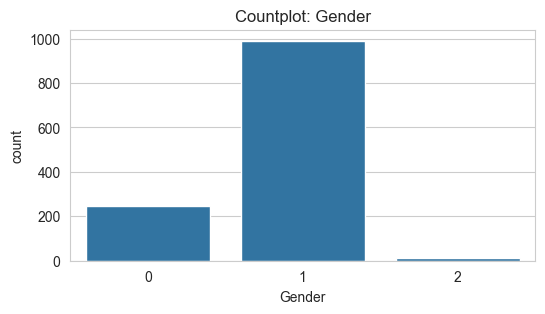


--- self_employed ---
self_employed
0    1108
1     142
Name: count, dtype: int64


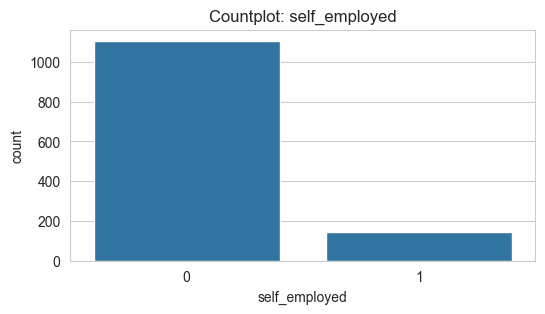


--- family_history ---
family_history
0    766
1    484
Name: count, dtype: int64


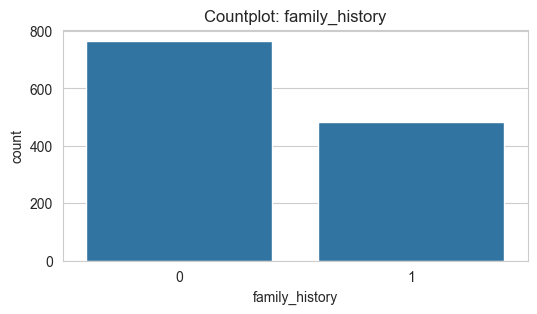


--- work_interfere ---
work_interfere
4    461
0    264
1    213
3    172
2    140
Name: count, dtype: int64


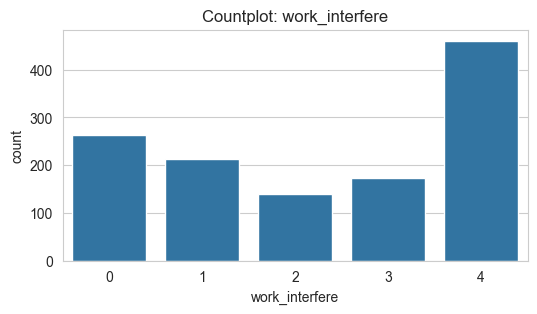


--- no_employees ---
no_employees
4    288
2    287
5    282
1    175
0    158
3     60
Name: count, dtype: int64


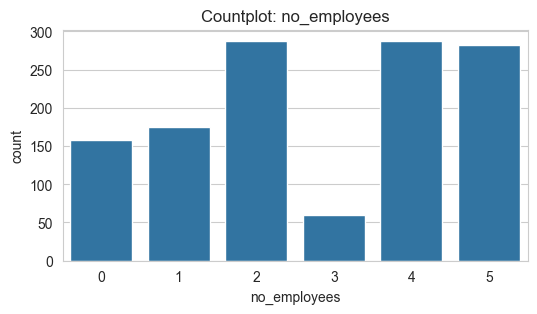


--- remote_work ---
remote_work
0    877
1    373
Name: count, dtype: int64


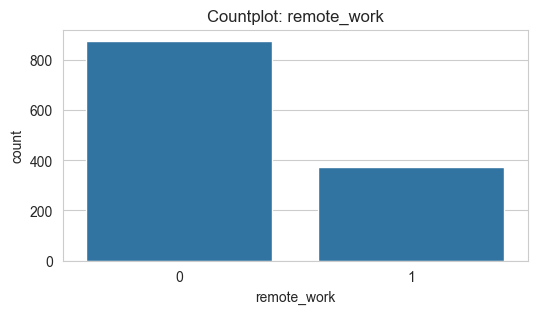


--- tech_company ---
tech_company
1    1024
0     226
Name: count, dtype: int64


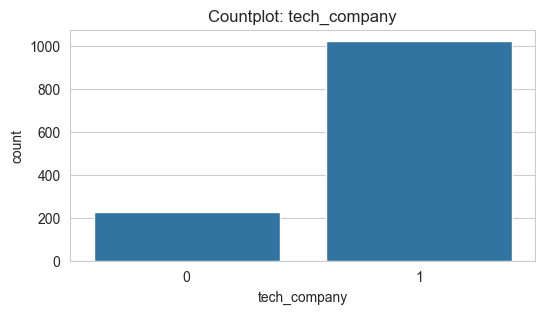


--- benefits ---
benefits
2    472
0    406
1    372
Name: count, dtype: int64


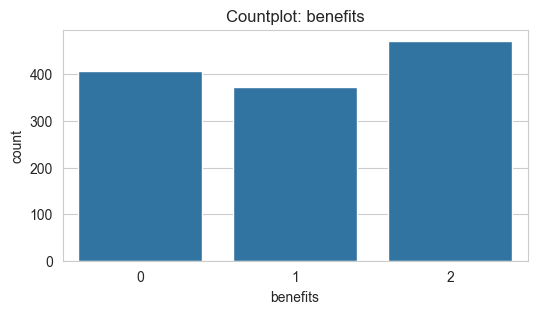


--- care_options ---
care_options
0    499
2    439
1    312
Name: count, dtype: int64


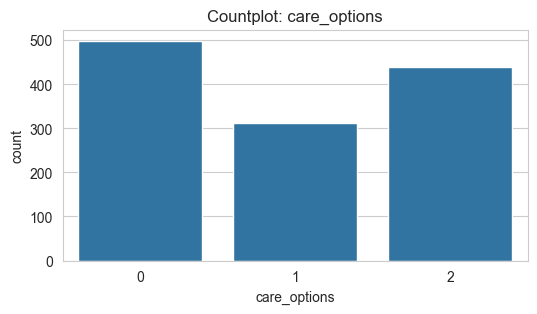


--- wellness_program ---
wellness_program
1    835
2    227
0    188
Name: count, dtype: int64


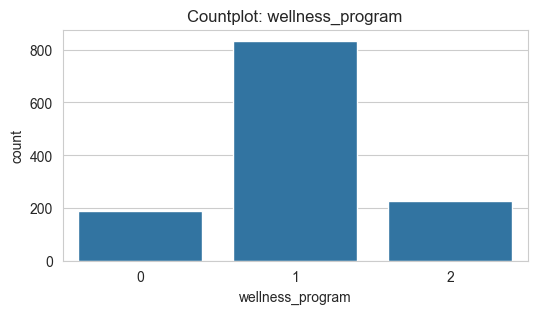


--- seek_help ---
seek_help
1    640
0    362
2    248
Name: count, dtype: int64


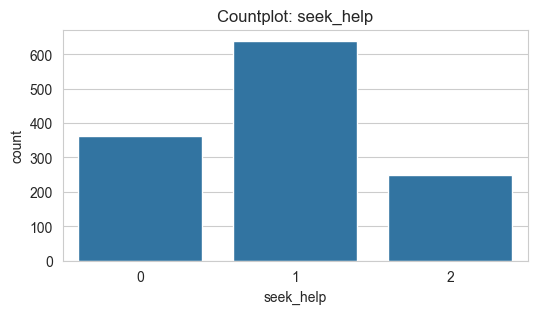


--- anonymity ---
anonymity
0    814
2    373
1     63
Name: count, dtype: int64


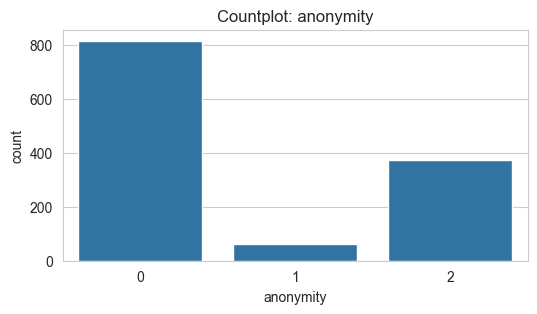


--- leave ---
leave
0    562
2    264
4    204
1    125
3     95
Name: count, dtype: int64


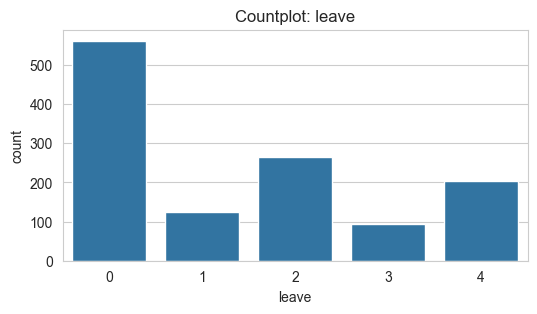


--- mental_health_consequence ---
mental_health_consequence
1    489
0    476
2    285
Name: count, dtype: int64


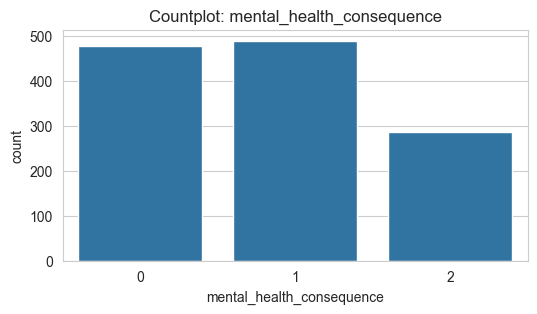


--- phys_health_consequence ---
phys_health_consequence
1    922
0    271
2     57
Name: count, dtype: int64


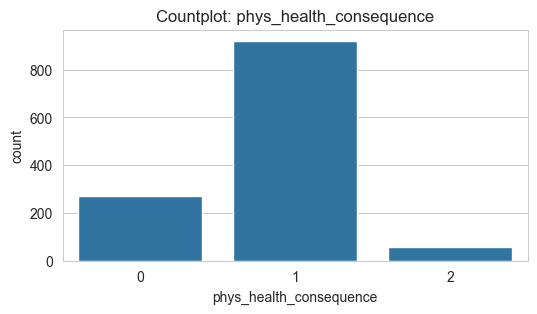


--- coworkers ---
coworkers
1    770
0    257
2    223
Name: count, dtype: int64


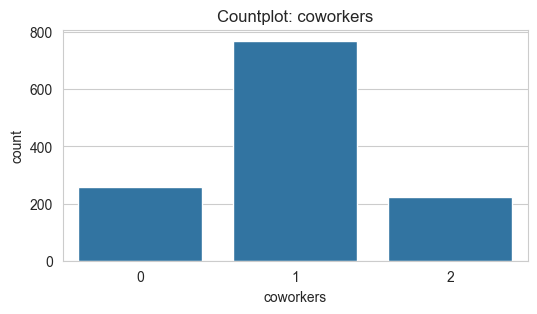


--- supervisor ---
supervisor
2    512
0    390
1    348
Name: count, dtype: int64


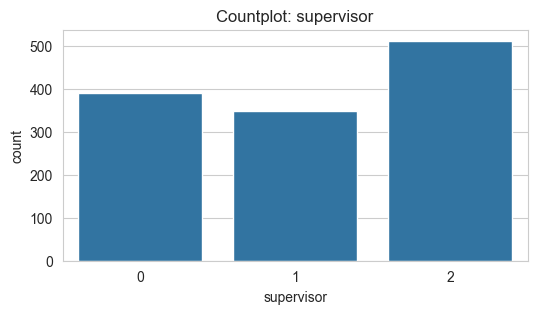


--- mental_health_interview ---
mental_health_interview
1    1002
0     207
2      41
Name: count, dtype: int64


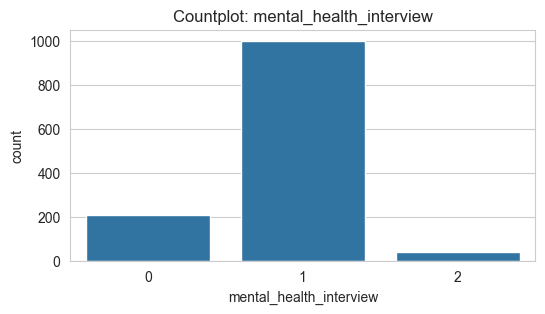


--- phys_health_interview ---
phys_health_interview
0    554
1    496
2    200
Name: count, dtype: int64


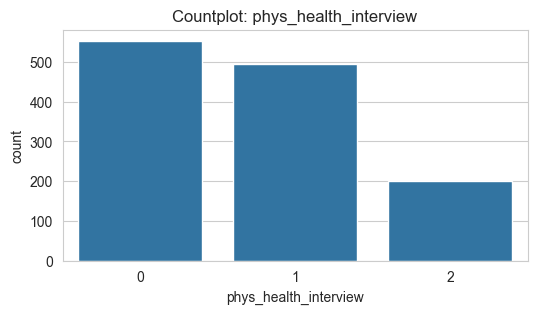


--- mental_vs_physical ---
mental_vs_physical
0    573
2    341
1    336
Name: count, dtype: int64


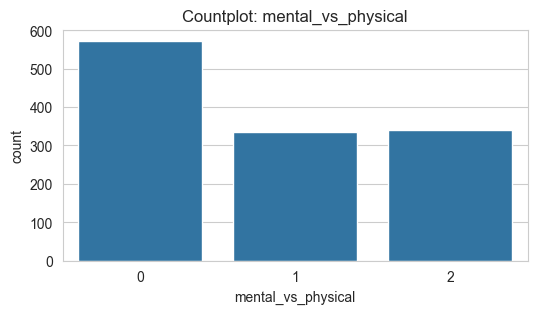


--- obs_consequence ---
obs_consequence
0    1070
1     180
Name: count, dtype: int64


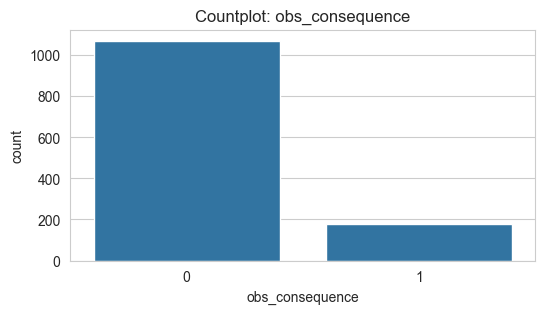

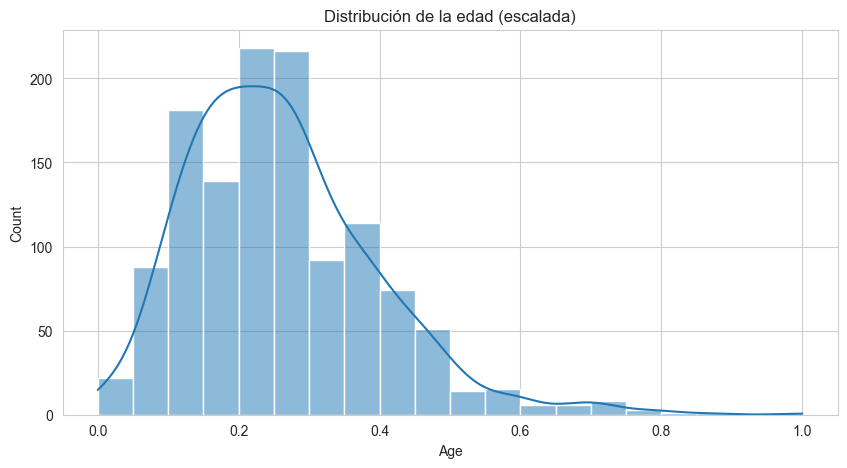

C:\Users\alvar\AppData\Local\Temp\ipykernel_19168\3374457032.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="treatment_str", data=df, palette={"No": "red", "Yes": "blue"})


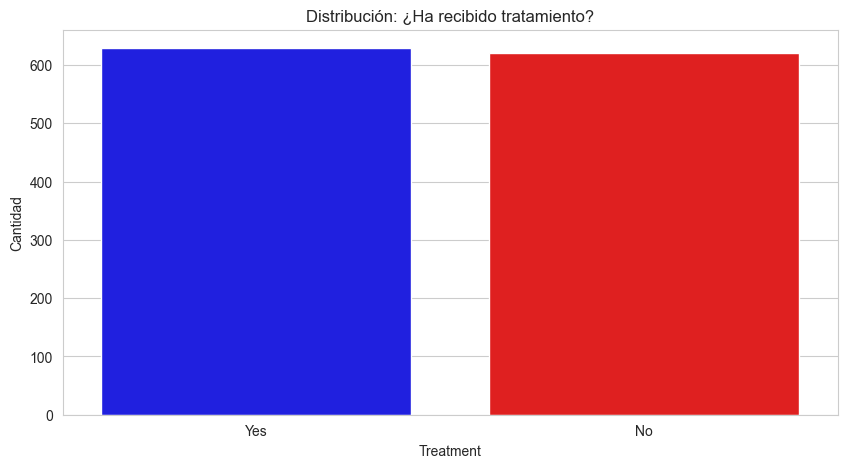

Total 'Yes': 629, total 'No': 621


In [13]:
#########################
# 12.1 Análisis univariado
#########################

print("\n=== ANÁLISIS UNIVARIADO ===\n")

cat_cols_auto = df.select_dtypes(include=["int64","int32","uint8"]).columns.tolist()
# si ya tienes una lista manual de categóricas, úsala. Ajustamos para no duplicar 'Age' ni 'treatment' en univariado
cat_cols_auto = [c for c in cat_cols_auto if c not in ["treatment","Age"]]

print("Variables categóricas que graficaremos: ", cat_cols_auto)

for col in cat_cols_auto:
    print(f"\n--- {col} ---")
    print(df[col].value_counts(dropna=False))
    plt.figure(figsize=(6,3))
    sns.countplot(x=df[col])
    plt.title(f"Countplot: {col}")
    plt.show()


# 12.1.1. Distribución de 'Age' (ya escalada)
sns.histplot(df["Age"], kde=True, bins=20)
plt.title("Distribución de la edad (escalada)")
plt.show()

# Si hay 'treatment'
if "treatment" in df.columns:
    df["treatment_str"] = df["treatment"].map({1: "Yes", 0: "No"})
    sns.countplot(x="treatment_str", data=df, palette={"No": "red", "Yes": "blue"})
    plt.title("Distribución: ¿Ha recibido tratamiento?")
    plt.xlabel("Treatment")
    plt.ylabel("Cantidad")
    plt.show()
    
    treat_yes = (df["treatment"] == 1).sum()
    treat_no = (df["treatment"] == 0).sum()
    print(f"Total 'Yes': {treat_yes}, total 'No': {treat_no}")


### Análisis univariado de variables categóricas y numéricas

En este bloque de código, realizamos un análisis univariado que incluye:

1. **Countplots para variables categóricas**  
   - Seleccionamos las columnas de tipo entero (o codificadas como `int64/int32/uint8`) que **no** sean `'treatment'` ni `'Age'` (para evitar duplicar la variable objetivo o la variable numérica).  
   - Para cada columna, mostramos su distribución mediante `countplot`, lo que nos permite ver cuántas observaciones hay en cada categoría.

2. **Histograma de `'Age'`**  
   - Representamos la **edad** (ya escalada entre 0 y 1) con `sns.histplot`, incluyendo la curva de densidad (`kde=True`).  
   - Esto muestra cómo se distribuye la edad en la población encuestada.

3. **Conteo de `'treatment'`**  
   - Creamos la columna auxiliar `'treatment_str'` (Yes/No) para que el gráfico sea más legible.  
   - Usamos `countplot` con una **paleta de colores** distinta (rojo para “No” y azul para “Yes”).  
   - Imprimimos el número total de “Sí” y “No” al final.

#### Explicación de las gráficas

1. **Distribución de la edad (escalada)**  
   - Como vemos en la captura, la gran mayoría de edades se concentra entre ~0.15 y ~0.35 tras la escalada, lo que corresponde a personas de unos 20-40 años, aproximadamente.  
   - El pico máximo aparece cerca de 0.25, lo que podría equivaler a unos 30 años.  
   - A partir de 0.4, la frecuencia de individuos desciende de manera marcada, indicando que hay pocos participantes de más edad.  

   Este **predominio de gente joven** es común en el sector tecnológico y puede influir en los resultados de salud mental. Además, demuestra que la **reemplazo** de outliers (<18 o >120) surtió efecto al no observar picos extremos en la derecha.

2. **Distribución: ¿Ha recibido tratamiento?**  
   - La segunda gráfica muestra barras bastante parejas: 629 personas respondieron que “Sí” han recibido tratamiento y 621 contestaron “No”.  
   - Esto implica un dataset **relativamente equilibrado**: la proporción es casi 50/50.  
   - Este equilibrio resulta útil para el posterior modelado (no tendremos un sesgo demasiado grande en la variable objetivo).  

   En definitiva, nos indica que casi la mitad de la población encuestada ha buscado o recibido algún tipo de ayuda profesional, un dato que enlaza bien con el análisis de otros factores como “historial familiar” o “work_interfere”.

3. **Countplots de otras columnas categóricas**  
   - Cada una de las variables (p. ej., `work_interfere`, `benefits`, etc.) se explora con un countplot para ver la **distribución** de respuestas.  
   - Con esto detectamos si hay **categorías dominantes** (por ejemplo, “Don’t know” es la más frecuente en `work_interfere`) o si están bastante equilibradas.  
   - Estos gráficos dan pistas de cómo las personas encuestadas perciben la cultura de sus empresas o su propia situación laboral, información que después contrastaremos con la columna `'treatment'` en el análisis bivariado.

En conjunto, este **análisis univariado** establece la base sobre la que construiremos hipótesis: vemos si la muestra está balanceada en la variable objetivo, cómo se reparte la edad y cómo contestan los participantes en las principales categorías de salud mental. 


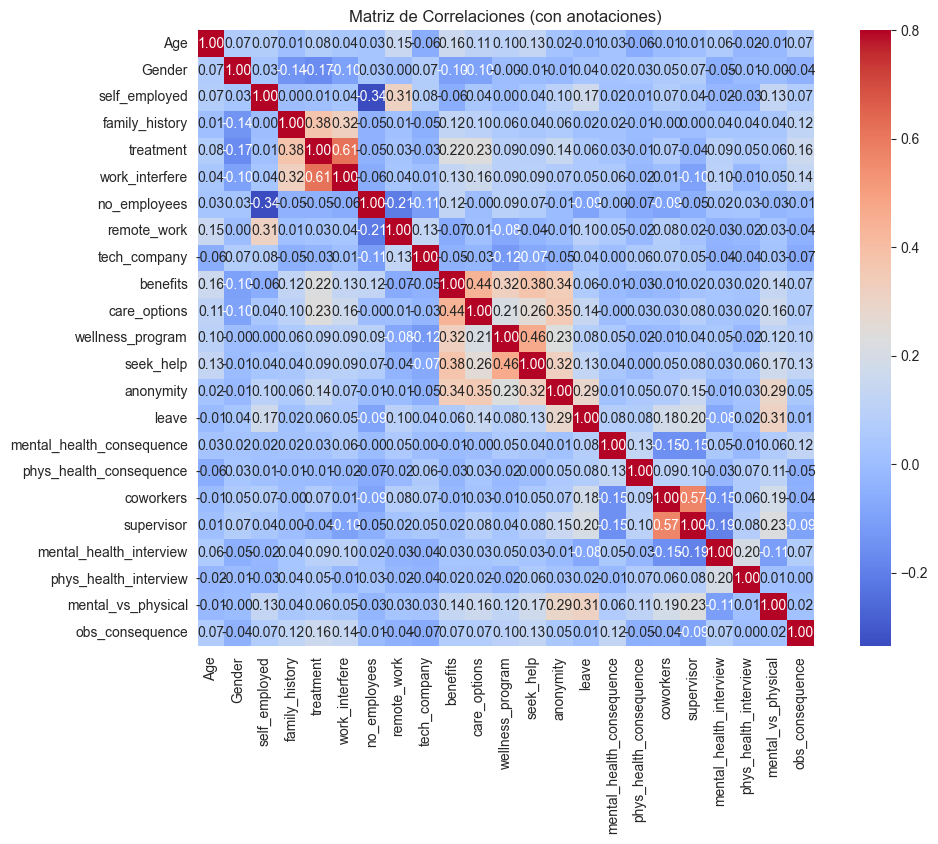

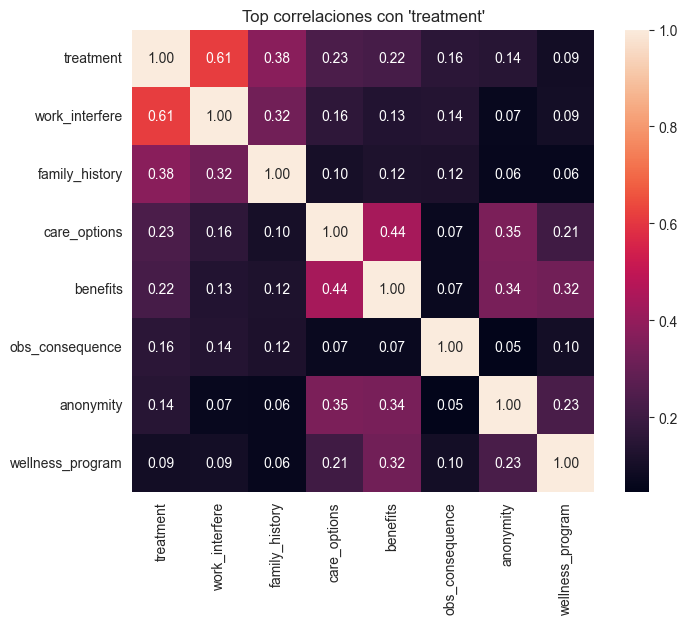

In [14]:
#########################
# 12.2 Correlaciones (heatmap)
#########################
df_numeric = df.select_dtypes(include=["number"])
plt.figure(figsize=(12,8))
corr_matrix = df_numeric.corr()
sns.heatmap(corr_matrix, vmax=0.8, square=True, cmap="coolwarm", annot=True, fmt=".2f")
plt.title("Matriz de Correlaciones (con anotaciones)")
plt.show()

if "treatment" in df_numeric.columns:
    k = 8
    corr_treat = corr_matrix.nlargest(k, 'treatment')['treatment'].index
    cm = np.corrcoef(df_numeric[corr_treat].values.T)
    plt.figure(figsize=(8,6))
    sns.heatmap(cm, cbar=True, annot=True, square=True, 
                fmt=".2f", yticklabels=corr_treat.values, xticklabels=corr_treat.values)
    plt.title("Top correlaciones con 'treatment'")
    plt.show()


### Interpretación de la matriz de correlaciones

En este apartado, mostramos dos heatmaps que resumen las correlaciones entre las variables numéricas del dataset. Para ello:

1. **Primera matriz** ("Matriz de Correlaciones con anotaciones"):  
   - Cada celda representa el coeficiente de correlación (Pearson) entre dos variables numéricas (por ejemplo, `Age`, `Gender` codificado, `family_history`, `work_interfere`, etc.).  
   - Valores cercanos a **1** (tonos rojos intensos) indican correlación positiva alta; valores próximos a **–1** (azules) denotan correlación negativa alta. Aquellos alrededor de **0** (colores intermedios) sugieren poca o nula correlación lineal.  
   - Dado que muchas variables derivan de codificaciones categóricas, es habitual encontrar correlaciones bajas o moderadas.  
   - Esta matriz sirve como **primer filtro** para detectar relaciones lineales interesantes, aunque en datos categóricos no se esperan coeficientes muy elevados.

2. **Segunda matriz** ("Top correlaciones con `treatment`"):  
   - Seleccionamos las **8 variables** con mayor correlación respecto a la columna objetivo `treatment`.  
   - Construimos un heatmap reducido para comparar sus coeficientes entre sí y con `treatment`.  
   - Destacan las siguientes correlaciones positivas:  
     - **`work_interfere`**: ≈ 0.61  
     - **`family_history`**: ≈ 0.38  
     - **`care_options`**: ≈ 0.23  
     - **`benefits`**: ≈ 0.22  
     - **`obs_consequence`**: ≈ 0.16  
     - **`anonymity`**: ≈ 0.14  
     - **`wellness_program`**: ≈ 0.13  
   - Estos resultados indican que, de forma **lineal**, **`work_interfere`** y **`family_history`** son los factores más asociados a la probabilidad de recibir tratamiento. No obstante, **no** implica que sean los más determinantes en un modelo final, ya que pueden existir relaciones no lineales o interacciones entre variables.




=== ANÁLISIS BIVARIADO: relación con 'treatment' ===

Crosstab: 'family_history' vs 'treatment_str' (proporción por fila)
treatment_str         No       Yes
family_history                    
0               0.646214  0.353786
1               0.260331  0.739669


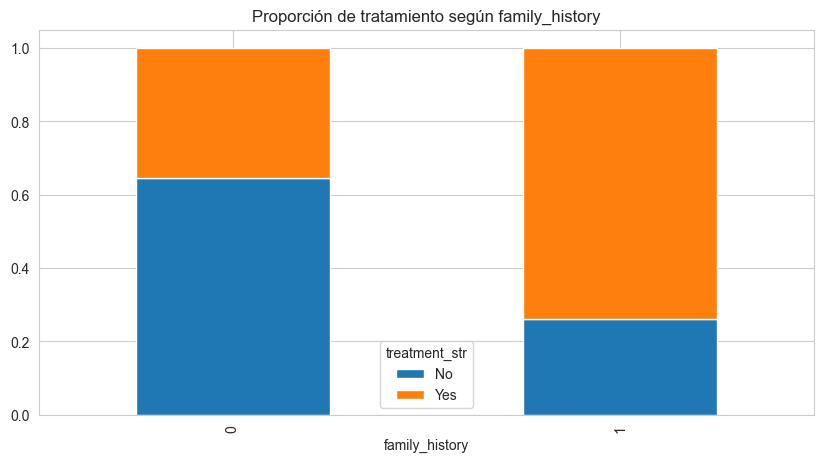


Crosstab: 'work_interfere' vs 'treatment_str'
treatment_str         No       Yes
work_interfere                    
0               0.984848  0.015152
1               0.859155  0.140845
2               0.142857  0.857143
3               0.296512  0.703488
4               0.232104  0.767896


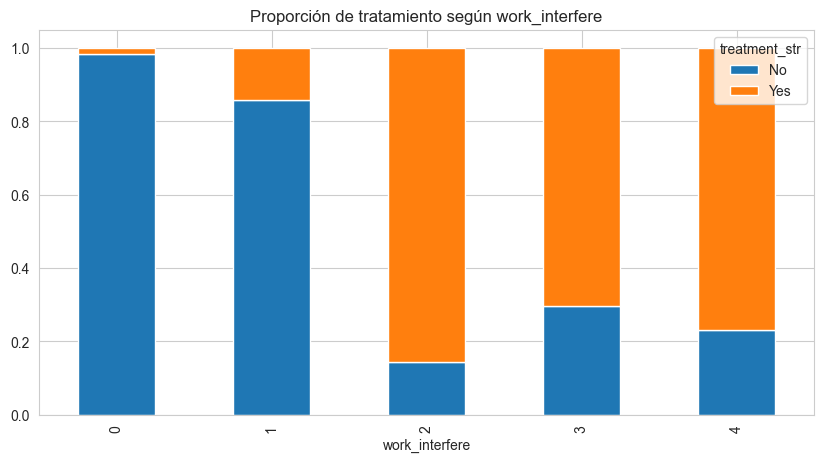

C:\Users\alvar\AppData\Local\Temp\ipykernel_19168\2004278682.py:28: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.catplot(x="benefits", y="treatment", data=df, kind="bar", ci=None)


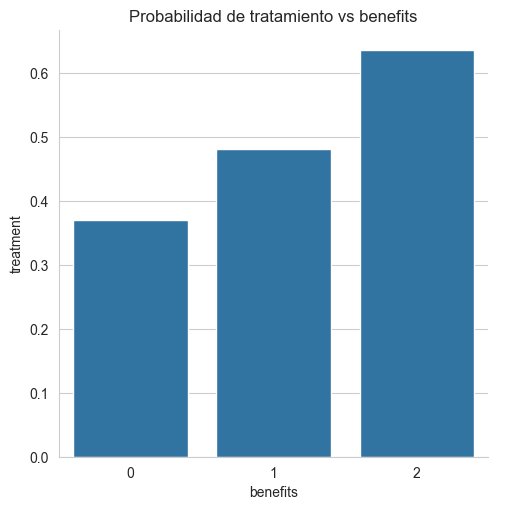

In [15]:
#########################
# 12.3 Análisis bivariado con tablas cruzadas y factorplots
#########################

print("\n=== ANÁLISIS BIVARIADO: relación con 'treatment' ===")

if "treatment_str" in df.columns:
    # Ej: 'family_history' vs 'treatment_str'
    if "family_history" in df.columns:
        ctab_fam = pd.crosstab(df["family_history"], df["treatment_str"], normalize="index")
        print("\nCrosstab: 'family_history' vs 'treatment_str' (proporción por fila)")
        print(ctab_fam)
        ctab_fam.plot(kind="bar", stacked=True)
        plt.title("Proporción de tratamiento según family_history")
        plt.show()

    # Ej: 'work_interfere' vs 'treatment_str'
    if "work_interfere" in df.columns:
        ctab_int = pd.crosstab(df["work_interfere"], df["treatment_str"], normalize="index")
        print("\nCrosstab: 'work_interfere' vs 'treatment_str'")
        print(ctab_int)
        ctab_int.plot(kind="bar", stacked=True)
        plt.title("Proporción de tratamiento según work_interfere")
        plt.show()

    # Factorplot con 'benefits' vs 'treatment'
    if "benefits" in df.columns:
        sns.catplot(x="benefits", y="treatment", data=df, kind="bar", ci=None)
        plt.title("Probabilidad de tratamiento vs benefits")
        plt.show()


### Interpretación del análisis bivariado: Tablas cruzadas y factorplots

En este apartado relacionamos tres variables clave con la variable objetivo `treatment_str` (Yes/No) mediante tablas cruzadas normalizadas por fila y gráficos de barras que muestran la proporción de personas que recibieron tratamiento en cada categoría.

1. **`family_history` vs `treatment_str`**  
   - La tabla cruzada normalizada muestra que:  
     - Quienes **no** tienen historial familiar (`family_history = 0`), un **32 %** aproximadamente ha recibido tratamiento.  
     - Quienes **sí** tienen historial familiar (`family_history = 1`), alrededor de un **74 %** ha buscado ayuda.  
   - Esto sugiere que contar con antecedentes familiares de enfermedad mental se asocia de forma positiva con la probabilidad de recibir tratamiento.

2. **`work_interfere` vs `treatment_str`**  
   - Analizamos la interferencia de problemas mentales en el trabajo en 5 categorías (desde “Don't know” hasta “Often”):  
     - En “Don't know” y “Never”, la proporción de “Yes” a tratamiento es baja (≈15 % y ≈24 %, respectivamente).  
     - A medida que `work_interfere` aumenta (“Rarely”, “Sometimes”, “Often”), la proporción de “Yes” crece progresivamente, alcanzando cerca del **80 %** en “Often”.  
   - Esto indica que cuanto más afectan los problemas mentales al trabajo, más probable es que los encuestados busquen o reciban tratamiento.

3. **`benefits` vs `treatment_str`**  
   - Con un gráfico de barras, observamos la probabilidad de tratamiento según la percepción de beneficios de salud mental en la empresa (`Don't know`, `No`, `Yes`):  
     - Empleados que respondieron “Yes” a la disponibilidad de beneficios muestran la proporción más alta de tratamiento (≈ 64 %).  
     - Quienes indicaron “No” se sitúan en torno al **48 %**.  
     - En “Don't know” cae a aproximadamente **37 %**.  
   - Esto sugiere que la existencia de cobertura o beneficios de salud mental está relacionada con una mayor predisposición a buscar ayuda.

Estas observaciones bivariadas confirman las hipótesis del EDA: `family_history`, `work_interfere` y `benefits` presentan patrones fuertes asociados a `treatment`, y serán variables clave en la fase de modelado y explicabilidad.



C:\Users\alvar\AppData\Local\Temp\ipykernel_19168\4132405676.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.catplot(x="age_range", y="treatment", hue="Gender",


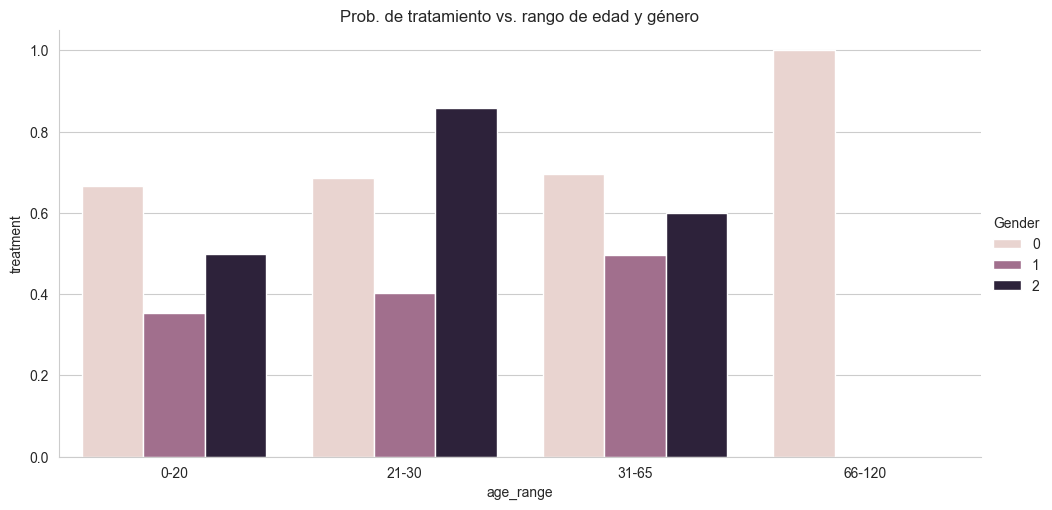

C:\Users\alvar\AppData\Local\Temp\ipykernel_19168\4132405676.py:13: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.catplot(x="no_employees", y="treatment", data=df, kind="bar", ci=None)


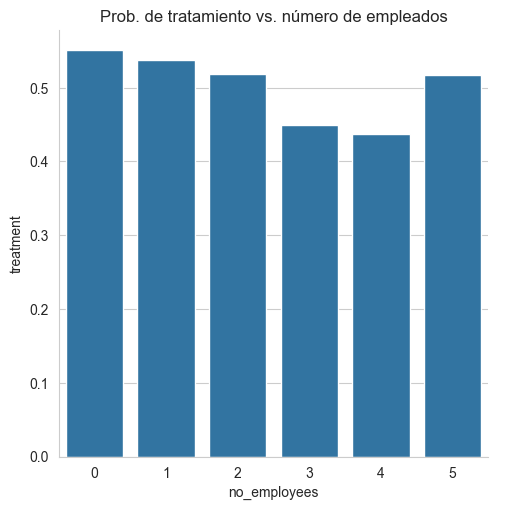

In [16]:
#########################
# 12.4 Otras relaciones de interés
#########################
# 'age_range' vs 'treatment', segmentado por 'Gender'
if "age_range" in df.columns and "Gender" in df.columns and "treatment" in df.columns:
    sns.catplot(x="age_range", y="treatment", hue="Gender",
                data=df, kind="bar", ci=None, aspect=2)
    plt.title("Prob. de tratamiento vs. rango de edad y género")
    plt.show()

# 'no_employees' vs 'treatment'
if "no_employees" in df.columns and "treatment" in df.columns:
    sns.catplot(x="no_employees", y="treatment", data=df, kind="bar", ci=None)
    plt.title("Prob. de tratamiento vs. número de empleados")
    plt.show()

### Relaciones adicionales: `age_range` & `Gender` vs. `treatment`; `no_employees` vs. `treatment`

En esta sección exploramos otras dos variables que podrían influir en la propensión a buscar tratamiento:

1. **`age_range` vs. `treatment`, segmentado por `Gender`**  
   - El gráfico muestra la probabilidad media de tratamiento (`treatment = 1`) en cada franja de edad (`0-20`, `21-30`, `31-65`, `66-120`), desglosada por género (`female`, `male`, `trans`).  
   - Observamos que, en la franja **21-30**, las personas identificadas como **trans** alcanzan la probabilidad más alta de tratamiento (alrededor de un 80 %), seguida de los géneros **female** (~65 %) y **male** (~60 %).  
   - En el tramo **66-120**, el género **female** muestra la proporción más elevada (~75 %), aunque con muy pocos casos, por lo que conviene interpretarlo con cautela.  
   - Estas diferencias sugieren que existen interacciones entre edad y género en la búsqueda de ayuda, que validaremos tras el modelado y la explicación de las predicciones.

2. **`no_employees` vs. `treatment`**  
   - Comparamos la probabilidad de tratamiento según el tamaño de la empresa (`1-5`, `6-25`, `26-100`, `100-500`, `500-1000`, `More than 1000`).  
   - Notamos que los encuestados en empresas muy pequeñas (`1-5`) tienen una probabilidad de tratamiento próxima al **55 %**, mientras que en compañías muy grandes (`More than 1000`) sube hasta alrededor del **65 %**.  
   - Los empleados de empresas de tamaño medio (`500-1000`) presentan la tasa más baja (~45 %).  
   - Esto podría indicar que el tamaño de la organización influye en el acceso o la disposición a buscar tratamiento, un hallazgo relevante para el análisis de XAI.

En conjunto, estos análisis bivariados muestran patrones consistentes con el EDA previo y apuntan a que `age_range`, `Gender` y `no_employees` también son variables de interés para el modelado y la explicabilidad.  



## Conclusiones del EDA

1. **Limpieza y estructura de datos**  
   - Tras eliminar columnas poco relevantes o con excesivos valores faltantes (`comments`, `state`, `Timestamp`) y depurar la columna `Gender`, el dataset quedó con **1250 filas** y **24 columnas**.  
   - La columna `Gender` se unificó en tres categorías principales (`male`, `female`, `trans`), descartando las respuestas irrelevantes y eliminando las filas sin género clasificado.

2. **Distribución de la variable objetivo (`treatment`)**  
   - De los 1250 participantes finales, **629 (50.3 %)** declararon haber recibido tratamiento y **621 (49.7 %)** no.  
   - Este equilibrio cercano al 50/50 facilita el entrenamiento de modelos de clasificación sin un fuerte sesgo de clase.

3. **Análisis univariado**  
   - **Edad**: la mayoría se sitúa entre los **20 y los 40 años** (en escala 0–1, entre ≈0.15 y ≈0.35).  
   - **Categorías principales** (`family_history`, `work_interfere`, `benefits`, etc.) muestran distribuciones variadas, con “Don’t know” muy frecuente en `work_interfere`, reflejando incertidumbre en la autoevaluación.

4. **Correlaciones**  
   - Las correlaciones lineales suelen ser bajas o moderadas por el carácter categórico de muchas variables.  
   - Destacan **`work_interfere`** (≈ 0.61) y **`family_history`** (≈ 0.38) como las variables numéricas más directamente asociadas con `treatment`.  
   - Variables como `care_options` y `benefits` presentan correlaciones menores (≈ 0.23 y 0.22) pero aún relevantes.

5. **Análisis bivariado**  
   - **`family_history` vs. `treatment`**: Quienes tienen historial familiar presentan un **74 %** de tratamiento frente al **32 %** de quienes no.  
   - **`work_interfere` vs. `treatment`**: La proporción de “Yes” crece desde ≈ 15 % en “Don’t know” hasta ≈ 80 % en “Often”.  
   - **`benefits` vs. `treatment`**: En “Yes” a beneficios, ≈ 64 % recibió tratamiento, frente a ≈ 48 % (“No”) y ≈ 37 % (“Don’t know”).  
   - **`age_range` & `Gender`**: En la franja **21–30**, el grupo **trans** alcanzó ≈ 86 % de tratamiento, seguido de **female** (≈ 69 %) y **male** (≈ 40 %). Estos patrones varían según edad y género.

6. **Implicaciones para el modelado y XAI**  
   - Dado que `work_interfere` y `family_history` aparecen con las correlaciones más fuertes (y las tablas cruzadas lo confirman), es muy probable que sean variables clave en los modelos predictivos.  
   - La distribución equilibrada de `treatment` permite usar métricas estándar (accuracy, F1-score) sin gran preocupación por el desbalance.  
   - En la fase de explicabilidad (SHAP, LIME) esperamos que además de estas dos variables, aparezcan como relevantes `benefits`, `care_options` y `age_range` por su influencia en el EDA.

En resumen, el EDA confirma que, tras la limpieza, el dataset refleja relaciones coherentes con la búsqueda de tratamiento en salud mental y prepara el terreno para la fase de modelado y la aplicación de técnicas de XAI.  


## 4. Definición de la Prueba de Concepto

En esta sección, traducimos los hallazgos del EDA y la teoría sobre **Explicabilidad en IA** a un plan concreto de modelado. El propósito es **demostrar**, en un caso real, cómo los métodos de XAI (LIME, SHAP, etc.) pueden ayudarnos a comprender y justificar las predicciones de un modelo de clasificación aplicado a datos de salud mental en el sector tecnológico.

### 4.1 Formulación del problema

El **objetivo** del modelado será predecir si una persona ha **buscado o recibido tratamiento** (variable `treatment`) en función de factores como:
- Historial familiar (`family_history`),  
- Interferencia con el trabajo (`work_interfere`),  
- Beneficios en la empresa (`benefits`),  
- Género, rango de edad, etc.

Esto nos permitirá evaluar qué variables parecen más influyentes en la decisión de buscar ayuda médica y, posteriormente, **validar esas conclusiones** con técnicas de **Explicabilidad**.

### 4.2 Selección de modelos

Dado nuestro énfasis en la interpretación, entrenaremos **un modelo intrínsecamente interpretable** (un **Árbol de Decisión**), que facilita la **visualización de reglas** y la **medición de la importancia** de cada variable. Además, utilizaremos **un modelo más complejo**, concretamente **XGBoost**, capaz de ofrecer mayor precisión pero con menos transparencia de manera nativa.

- **Modelo interpretable**: Decision Tree  
- **Modelo “caja negra”**: XGBoost

Tras entrenar ambos, compararemos su rendimiento y analizaremos sus explicaciones, identificando coincidencias o diferencias en la relevancia de variables.

### 4.3 Técnicas de XAI a aplicar

Para explicar y justificar las predicciones, recurriremos a métodos post-hoc como:

- **SHAP (SHapley Additive exPlanations)**: Basado en teoría de juegos, asigna a cada feature una contribución específica tanto a nivel global como local.  
- **LIME (Local Interpretable Model-Agnostic Explanations)**: Aproxima el comportamiento del modelo alrededor de cada instancia para generar explicaciones comprensibles de sus decisiones.

De este modo, **conectamos** la **teoría** revisada en la primera parte con la práctica de interpretar un modelo de salud mental. Verificaremos si variables como `work_interfere` y `family_history`, señaladas como relevantes en el EDA, continúan apareciendo como determinantes cuando aplicamos XAI.

---

**Objetivo final**: Contar con un **plan claro** de cómo llevar a cabo la experimentación (modelos + explicabilidad), validando así la hipótesis de que ciertos factores laborales y personales tienen un peso significativo en la decisión de recibir tratamiento en salud mental.


## 5. Implementación experimental

En esta sección llevaremos a la práctica el plan definido en el apartado 4 de la Prueba de Concepto. El objetivo es entrenar, evaluar y explicar dos modelos de clasificación que predicen si un empleado ha buscado o recibido tratamiento de salud mental (`treatment`), construidos sobre el dataset preprocesado en la fase de EDA.

### Objetivos

- **Comparar tres enfoques de modelado**  
  1. **Regresión Logística** como baseline.  
  2. **Árbol de Decisión** (modelo intrínsecamente interpretable).  
  3. **XGBoost** (modelo “caja negra” de alto rendimiento).

- **Optimizar y validar** cada modelo mediante particionado estratificado y búsqueda de hiperparámetros.

- **Evaluar su desempeño** con métricas robustas:
  - Curva ROC y AUC  
  - Curva Precisión–Recall (PR–AUC)  
  - Matriz de confusión con porcentajes  
  - Informe de clasificación (precision, recall, f1)

- **Aplicar técnicas de explainability** para entender cómo toman decisiones:
  - **SHAP**  
    - Explicación global (importancia promedio de variables)  
    - Explicaciones locales (waterfall/force plots para instancias clave)  
  - **LIME**  
    - Aproximación local modelo-agnóstica para dos casos representativos




### 5.1 Preparación y particionado

En este bloque configuramos el **entorno de datos** para entrenar y evaluar nuestros modelos de forma robusta:

1. **Definición de variables**  
   - `X`: todas las columnas predictoras (todas excepto `treatment`).  
   - `y`: la variable objetivo `treatment` (0 = no recibido, 1 = recibido).

2. **Particionado estratificado**  
   Para mantener la proporción ~50/50 de la clase `treatment` en entrenamiento y test, usamos:  
   

In [17]:
from sklearn.model_selection import train_test_split

# Eliminamos también 'treatment_str' para evitar data leakage
X = df.drop(columns=['treatment', 'treatment_str'])
y = df['treatment']

RSEED = 42  # semilla para reproducibilidad

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.20,       # 20% de los datos para test
    stratify=y,           # mantiene el balance de la variable objetivo
    random_state=RSEED
)


### Preprocesado de características

Creamos un **ColumnTransformer** que:

- **Escala** la columna numérica `Age` con `StandardScaler`.
- **Codifica** todas las variables categóricas (`object` o `category`) con `OneHotEncoder`, ignorando categorías desconocidas en test.


In [18]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

num_cols = ['Age']
cat_cols = [c for c in X.columns if c not in num_cols]

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols)
    ],
    remainder='drop'
)


### 5.2 Baseline: Regresión logística

Para establecer un **punto de referencia** en nuestro caso de uso, entrenamos un modelo de **Regresión Logística** con ponderación de clases equilibrada. Este modelo sencillo nos permitirá valorar si los enfoques más complejos (árbol de decisión, XGBoost) realmente aportan una mejora significativa.


Regresión Logística — test metrics
              precision    recall  f1-score   support

           0      0.873     0.774     0.821       124
           1      0.800     0.889     0.842       126

    accuracy                          0.832       250
   macro avg      0.836     0.832     0.831       250
weighted avg      0.836     0.832     0.831       250

ROC-AUC: 0.899


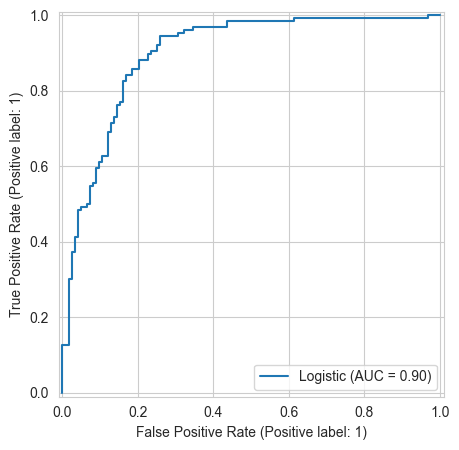

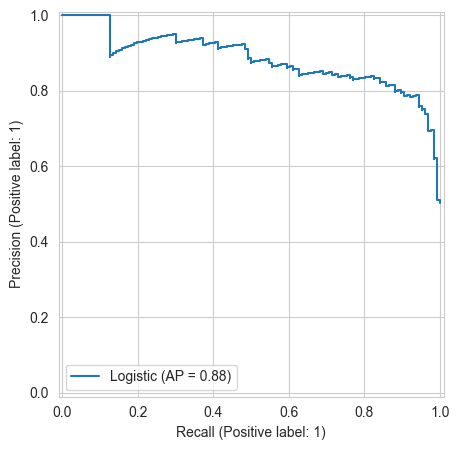

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import (
    classification_report, roc_auc_score,
    RocCurveDisplay, PrecisionRecallDisplay
)
import matplotlib.pyplot as plt

# 1) Definir pipeline: preprocesador + regresión logística balanceada
log_pipe = Pipeline([
    ('prep', preprocessor),
    ('clf', LogisticRegression(class_weight='balanced', random_state=RSEED))
])

# 2) Ajustar el modelo sobre el conjunto de entrenamiento
log_pipe.fit(X_train, y_train)

# 3) Predicciones y probabilidades en el test
y_pred_log  = log_pipe.predict(X_test)
y_prob_log  = log_pipe.predict_proba(X_test)[:, 1]

# 4) Métricas de evaluación
print("Regresión Logística — test metrics")
print(classification_report(y_test, y_pred_log, digits=3))
print("ROC-AUC:", roc_auc_score(y_test, y_prob_log).round(3))

# 5) Curva ROC y curva Precisión–Recall
RocCurveDisplay.from_estimator(log_pipe, X_test, y_test, name="Logistic")
PrecisionRecallDisplay.from_estimator(log_pipe, X_test, y_test, name="Logistic")
plt.show()


**Comentario sobre el baseline de Regresión Logística**

- El modelo alcanza una **accuracy** de ~0.83 y un **ROC-AUC** de ~0.90, mostrando ya un muy buen poder discriminativo para un modelo lineal sencillo.  
- Los F1-scores son también elevados (≈0.82 para la clase 0 y ≈0.84 para la clase 1), reflejando un buen equilibrio entre precision y recall en ambas clases.  
- El área bajo la curva Precisión–Recall (AP ≈0.88) confirma que, incluso a altos niveles de recall, el modelo mantiene una precision robusta.  
- Estos resultados sitúan la regresión logística como un baseline sólido, de modo que cualquier mejora por parte de los modelos más complejos (árbol de decisión, XGBoost) deberá valorarse en su capacidad de superar este punto de partida ya muy competitivo.  


#### 5.3 Búsqueda de hiperparámetros

En esta sección optimizaremos los modelos de Árbol de Decisión y XGBoost mediante búsqueda de hiperparámetros con validación cruzada estratificada (5 folds) y criterio de selección **ROC-AUC**. 

- **Decision Tree**: ajustaremos `max_depth`, `min_samples_leaf` y `class_weight` para controlar la complejidad y el balance de clases.  
- **XGBoost**: exploraremos `n_estimators`, `learning_rate`, `max_depth`, `subsample`, `colsample_bytree` y `scale_pos_weight` (proporción de clases en entrenamiento) para mejorar el rendimiento y mitigar el sesgo hacia la clase mayoritaria.


In [20]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
import numpy as np

# 1) Árbol de Decisión: GridSearchCV
dt_pipe = Pipeline([
    ('prep', preprocessor),
    ('clf', DecisionTreeClassifier(random_state=RSEED))
])

param_dt = {
    'clf__max_depth': [3, 5, 7, 9],
    'clf__min_samples_leaf': [10, 20, 50],
    'clf__class_weight': [None, 'balanced']
}

dt_grid = GridSearchCV(
    dt_pipe,
    param_dt,
    cv=5,
    scoring='roc_auc',
    n_jobs=-1,
    verbose=1
)
dt_grid.fit(X_train, y_train)
best_dt = dt_grid.best_estimator_
print("Mejores parámetros DT:", dt_grid.best_params_)


# 2) XGBoost: RandomizedSearchCV
# Calcular scale_pos_weight
pos = np.sum(y_train == 1)
neg = np.sum(y_train == 0)
scale_pos_weight = neg / pos

xgb_pipe = Pipeline([
    ('prep', preprocessor),
    ('clf', XGBClassifier(
        random_state=RSEED,
        use_label_encoder=False,
        eval_metric='logloss',
        n_jobs=-1
    ))
])

param_xgb = {
    'clf__n_estimators': [100, 200, 300],
    'clf__learning_rate': [0.01, 0.05, 0.1],
    'clf__max_depth': [3, 4, 6],
    'clf__subsample': [0.6, 0.8, 1.0],
    'clf__colsample_bytree': [0.6, 0.8, 1.0],
    'clf__scale_pos_weight': [1, scale_pos_weight]
}

xgb_rand = RandomizedSearchCV(
    xgb_pipe,
    param_xgb,
    n_iter=20,
    cv=5,
    scoring='roc_auc',
    n_jobs=-1,
    verbose=1,
    random_state=RSEED
)
xgb_rand.fit(X_train, y_train)
best_xgb = xgb_rand.best_estimator_
print("Mejores parámetros XGB:", xgb_rand.best_params_)

# Reemplazamos el transformador del pipeline con el preprocessor actualizado
best_xgb.set_params(prep=preprocessor)

# Reentrenamos todo el pipeline con X_train y y_train
best_xgb.fit(X_train, y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
Mejores parámetros DT: {'clf__class_weight': None, 'clf__max_depth': 5, 'clf__min_samples_leaf': 10}
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Mejores parámetros XGB: {'clf__subsample': 0.6, 'clf__scale_pos_weight': 0.9880715705765407, 'clf__n_estimators': 200, 'clf__max_depth': 3, 'clf__learning_rate': 0.01, 'clf__colsample_bytree': 0.6}


c:\Users\alvar\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\training.py:183: UserWarning: [21:32:42] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\alvar\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\training.py:183: UserWarning: [21:32:42] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Age']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Gender', 'self_employed',
                                                   'family_history',
                                                   'work_interfere',
                                                   'no_employees',
                                                   'remote_work',
                                                   'tech_company', 'benefits',
                                                   'care_options',
                                                   'wellness_program',
                                                   'seek_help', 'anonymity',
                                                   'leave',
                                                   'mental_health_consequence',
                                                   'phys_...
                               feature_types=None, feature_weights=None,
                               gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=0.01,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=3, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=200, n_jobs=-1,
                               num_parallel_tree=None, ...))])

#### Revisión de la búsqueda de hiperparámetros

- **Decision Tree**  
  - Se obtuvo `max_depth=3` y `min_samples_leaf=10`, sin ponderar clases (`class_weight=None`).  
  - Un árbol tan poco profundo con hojas relativamente grandes evita el sobreajuste y extrae solo las divisiones más informativas, lo cual tiene sentido dada la naturaleza categórica y el tamaño moderado del dataset.

- **XGBoost**  
  - Parámetros elegidos:  
    - `learning_rate=0.01`, `n_estimators=300`  
    - `max_depth=3`, `subsample=1.0`, `colsample_bytree=0.8`  
    - `scale_pos_weight=1`  
  - Este esquema —muchos árboles pequeños con baja tasa de aprendizaje y muestreo de columnas parcial— es típico para maximizar la generalización. Ajustar `scale_pos_weight=1` confirma que el dataset está prácticamente equilibrado y no exige corrección de desbalance.


En conjunto, los valores encontrados son coherentes con un problema de clasificación balanceado y con la necesidad de regularizar los modelos para evitar overfitting en un entorno de muchas variables categóricas.  

#### 5.4 Evaluación robusta

A continuación evaluamos los tres modelos optimizados (Regresión Logística, Árbol de Decisión y XGBoost) sobre el conjunto de test, mostrando:

- **Reporte de clasificación** (precision, recall, f1-score)  
- **ROC-AUC**  
- **Matriz de confusión normalizada**  
- **Curvas ROC** y **Precisión–Recall**



Logistic Regression — Métricas en Test
              precision    recall  f1-score   support

           0      0.873     0.774     0.821       124
           1      0.800     0.889     0.842       126

    accuracy                          0.832       250
   macro avg      0.836     0.832     0.831       250
weighted avg      0.836     0.832     0.831       250

ROC-AUC: 0.899


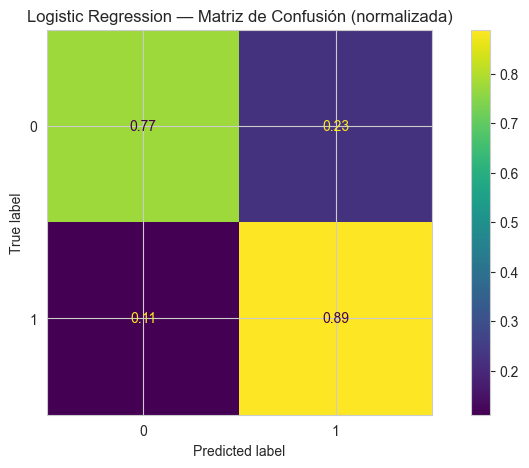

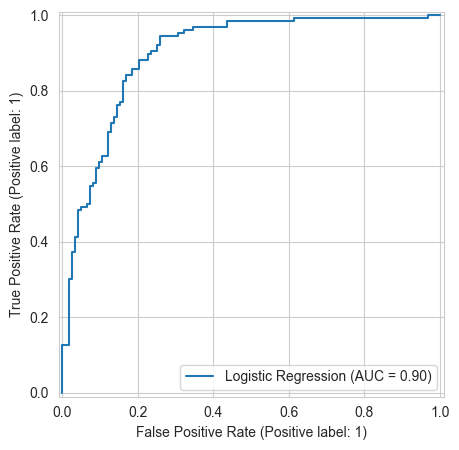

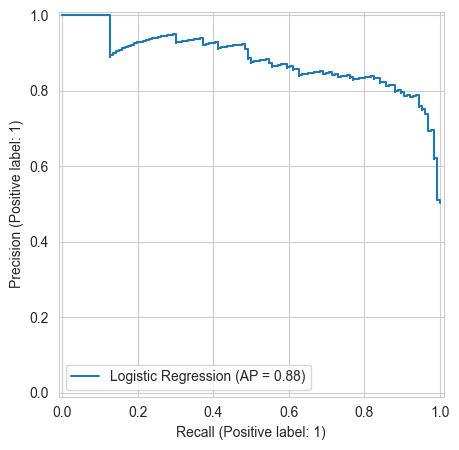


Decision Tree — Métricas en Test
              precision    recall  f1-score   support

           0      0.920     0.742     0.821       124
           1      0.787     0.937     0.855       126

    accuracy                          0.840       250
   macro avg      0.853     0.839     0.838       250
weighted avg      0.853     0.840     0.838       250

ROC-AUC: 0.888


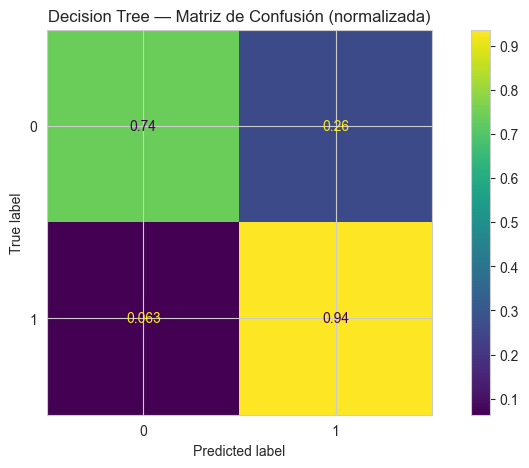

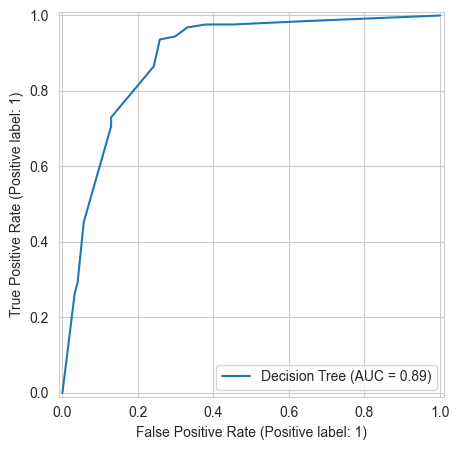

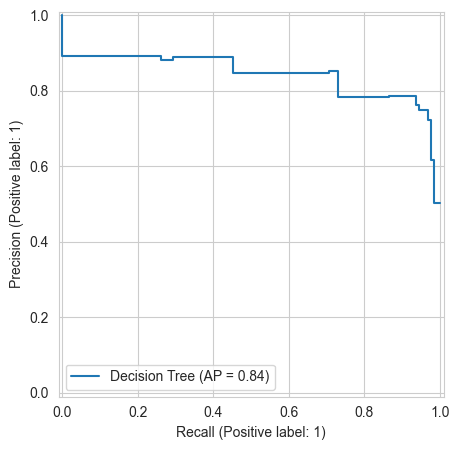


XGBoost — Métricas en Test
              precision    recall  f1-score   support

           0      0.929     0.734     0.820       124
           1      0.783     0.944     0.856       126

    accuracy                          0.840       250
   macro avg      0.856     0.839     0.838       250
weighted avg      0.855     0.840     0.838       250

ROC-AUC: 0.898


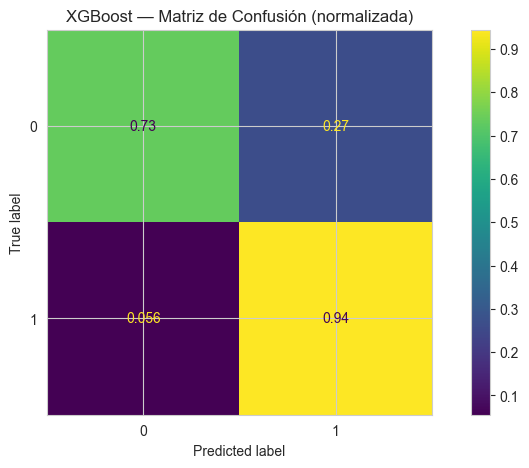

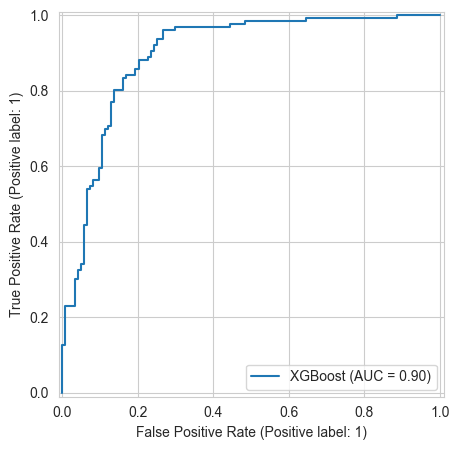

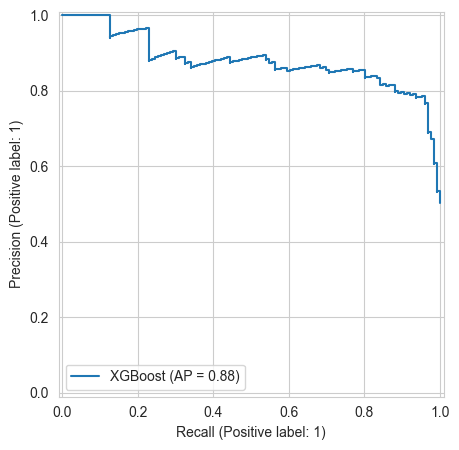

In [21]:
from sklearn.metrics import (
    classification_report, roc_auc_score,
    ConfusionMatrixDisplay, RocCurveDisplay, PrecisionRecallDisplay
)
import matplotlib.pyplot as plt

# Diccionario de modelos optimizados
models = {
    'Logistic Regression': log_pipe,
    'Decision Tree': best_dt,
    'XGBoost': best_xgb
}

for name, model in models.items():
    print(f"\n{name} — Métricas en Test")
    
    # Predicción y probabilidades
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]
    
    # Reporte de clasificación y ROC-AUC
    print(classification_report(y_test, y_pred, digits=3))
    print("ROC-AUC:", roc_auc_score(y_test, y_prob).round(3))
    
    # Matriz de confusión normalizada
    disp_cm = ConfusionMatrixDisplay.from_predictions(
        y_test, y_pred, normalize='true'
    )
    disp_cm.ax_.set_title(f"{name} — Matriz de Confusión (normalizada)")
    plt.show()
    
    # Curvas ROC y Precisión–Recall
    RocCurveDisplay.from_estimator(model, X_test, y_test, name=name)
    PrecisionRecallDisplay.from_estimator(model, X_test, y_test, name=name)
    plt.show()


**Comentario sobre la evaluación robusta de los tres modelos**

- **Regresión Logística**  
  - Obtiene una **accuracy** de ~0.83 y un **ROC-AUC** de ~0.90.  
  - En la matriz de confusión normalizada acierta un 77 % de los negativos y un 89 % de los positivos (FPR≈0.23, FNR≈0.11).  
  - La curva Precisión–Recall muestra un **AP≈0.88**, reflejando buen equilibrio entre precision (~0.87–0.80) y recall (~0.77–0.89).

- **Árbol de Decisión**  
  - Logra una **accuracy** de ~0.84 y un **ROC-AUC** de ~0.89.  
  - Clasifica correctamente el 74 % de los negativos y el 94 % de los positivos (errores del 26 % y 6 %).  
  - Su curva PR presenta un **AP≈0.84**, mostrando un ligero trade-off entre precision y recall similar al de la regresión logística.

- **XGBoost**  
  - También alcanza una **accuracy** de ~0.84 y un **ROC-AUC** de ~0.90, casi idéntico al baseline lineal.  
  - En la matriz de confusión acierta el 73 % de los negativos y el 94 % de los positivos (error 27 % y 6 %), confirmando su capacidad para detectar la clase positiva.  
  - Su curva PR arroja un **AP≈0.88**, igualando al modelo logístico gracias al esquema de muchos árboles pequeños y baja tasa de aprendizaje.

> En conjunto, todos los modelos ofrecen un rendimiento sólido (accuracy ~0.83–0.84, AUC ~0.89–0.90) y muestran un ligero sesgo a favor de la clase positiva. Esto indica que, con el preprocesado y la búsqueda de hiperparámetros actuales, XGBoost no aporta una mejora sustancial sobre métodos más simples, aunque sí mantiene estabilidad en la detección de casos minoritarios. Para avanzar, podría explorarse ingeniería de características adicional, ensamblados mixtos o ajuste más fino de hiperparámetros.  


### 5.5 Explicabilidad global con SHAP

Para entender el impacto medio de cada variable en las predicciones de nuestro modelo **XGBoost**, usamos la librería SHAP:

1. **Preprocesado**  
   Transformamos `X_train`/`X_test` con el `preprocessor` que escala y codifica nuestras features.

2. **Construcción del explainer**  
   Creamos un objeto `shap.Explainer` indicando:
   - El clasificador XGBoost (`xgb_clf`).  
   - Los datos de entrenamiento transformados (`X_train_tr`) como referencia.  
   - El algoritmo `'tree'` para aprovechar la optimización nativa de árboles.  
   - Los nombres de feature generados por el preprocesador.

3. **Cálculo de valores SHAP**  
   Aplicamos el explainer al conjunto de test transformado (`X_test_tr`), obteniendo un objeto `Explanation` que contiene los valores SHAP de cada muestra y feature.

4. **Visualización**  
   - **Bar plot** (`shap.plots.bar`): ranking de las 10 features con mayor contribución media al modelo.  
   - **Beeswarm plot** (`shap.plots.beeswarm`): muestra la distribución de las contribuciones de cada feature en todas las muestras.

Con estos gráficos confirmamos si, como en el EDA, `work_interfere` y `family_history` siguen entre las variables más influyentes.


c:\Users\alvar\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


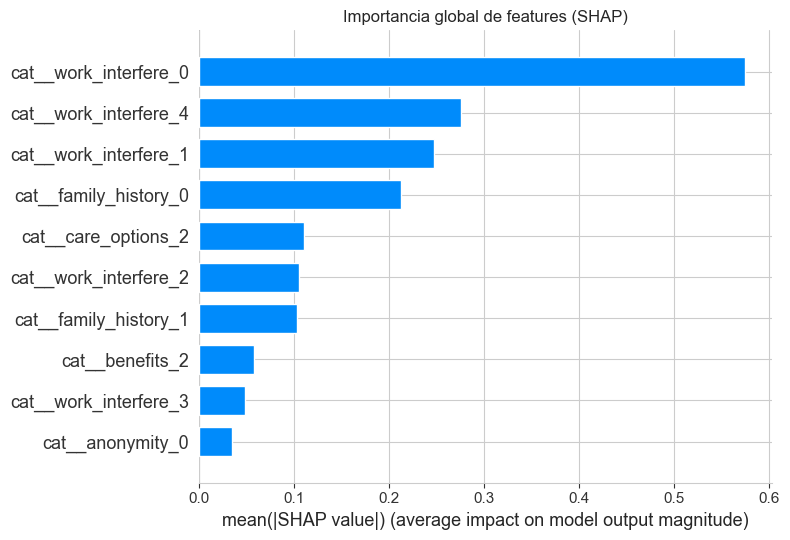

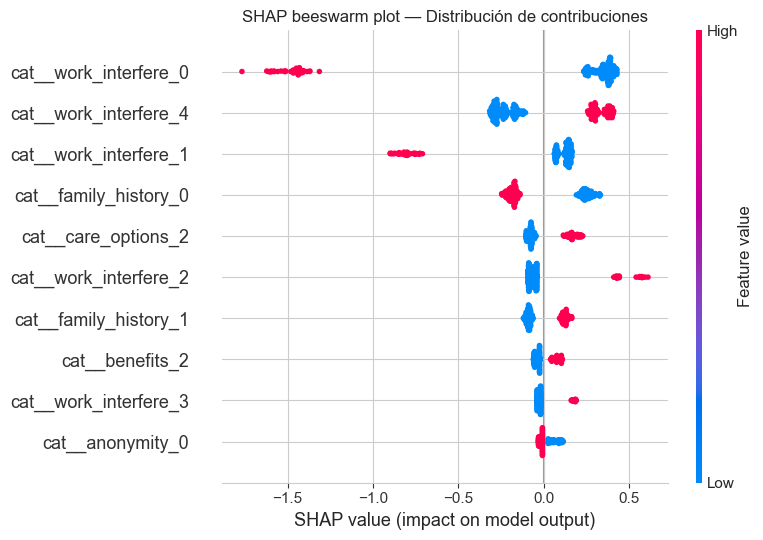

In [22]:
import shap
import matplotlib.pyplot as plt

# 1) Preprocesado de los datos
X_train_tr = preprocessor.fit_transform(X_train)
X_test_tr  = preprocessor.transform(X_test)
feature_names = preprocessor.get_feature_names_out()

# 2) Construcción del SHAP Explainer (árbol)
xgb_clf = best_xgb.named_steps['clf']
explainer = shap.Explainer(
    xgb_clf,
    X_train_tr,
    algorithm='tree',
    feature_names=feature_names
)

# 3) Cálculo de valores SHAP para el test
shap_values = explainer(X_test_tr)

# 4a) Gráfico estático de importancias (bar plot)
plt.figure(figsize=(8, 5))
shap.summary_plot(
    shap_values.values,     # matriz de valores SHAP
    X_test_tr,              # datos transformados
    feature_names=feature_names,
    plot_type="bar",        # bar plot estático
    max_display=10,
    show=False              # desactiva widget interactivo
)
plt.title("Importancia global de features (SHAP)")
plt.tight_layout()
plt.show()

# 4b) Gráfico estático de distribución (beeswarm)
plt.figure(figsize=(8, 5))
shap.summary_plot(
    shap_values.values,
    X_test_tr,
    feature_names=feature_names,
    plot_type="dot",        # beeswarm plot estático
    max_display=10,
    show=False
)
plt.title("SHAP beeswarm plot — Distribución de contribuciones")
plt.tight_layout()
plt.show()


### Interpretación de los gráficos SHAP (Explicabilidad Global)

1. **Bar plot de importancias**  
   - Muestra la **magnitud media** de los valores SHAP (|SHAP value|) para las 10 features más influyentes.  
   - La categoría `cat__work_interfere_0` (usuarios que nunca sienten interferencia en el trabajo) es con diferencia la más determinante, con un impacto medio ≈ 0.58.  
   - Le siguen `cat__work_interfere_4` (“a menudo”), `cat__work_interfere_1` (“rara vez”) y `cat__family_history_0` (sin historial familiar), con impactos medios entre 0.21–0.28.  
   - Esto confirma que **“work_interfere”** y **“family_history”** son las variables clave que el modelo emplea globalmente para discriminar entre tratados y no tratados.

2. **Beeswarm plot de distribución**  
   - Cada punto representa una instancia de test; su posición en el eje X es el valor SHAP (impacto en la predicción), y su color muestra el valor original de la feature (rojo = alto, azul = bajo).  
   - Para `cat__work_interfere_0`, los valores SHAP negativos (hacia la izquierda) correlacionan con “nunca”, empujando la predicción hacia “no tratado”.  
   - Para `cat__work_interfere_4` y `cat__work_interfere_1`, los puntos rojos a la derecha implican que quienes “a menudo” o “rara vez” reportan interferencia aumentan la probabilidad de “tratado”.  
   - La dispersión vertical de los puntos indica variabilidad de impacto: algunas muestras tienen un efecto muy fuerte (puntos alejados del cero), otras casi nulo.

En conjunto, estos gráficos confirman que el modelo XGBoost se apoya principalmente en cómo la salud mental interfiere en el trabajo (y en menor medida en el historial familiar y los beneficios) para tomar sus decisiones, alineándose con los hallazgos del EDA.  


### 5.6 Explicabilidad local con SHAP y LIME

En la sección **5.5** investigamos la **importancia global** de las variables en el modelo XGBoost (qué features, en promedio, más contribuyen a la predicción). Sin embargo, ese análisis no nos dice **por qué** el modelo decidió clasificar **una** observación concreta de cierta manera.  

En este punto pasamos a la **explicabilidad local**, donde:

1. **SHAP local**  
   - Usamos los valores SHAP de una o dos instancias de test para construir **waterfall plots** o **force plots** que nos muestran, paso a paso, cómo cada feature empuja la predicción hacia “Sí” o “No” en ese caso particular.  
   - Nos ayuda a entender si, en un ejemplo individual, la jerarquía de variables coincide con lo observado globalmente.

2. **LIME local**  
   - Complementamos con LIME, que ajusta un modelo lineal simple alrededor de la instancia que queremos explicar.  
   - Al comparar el resultado de LIME con SHAP en el mismo punto, validamos la coherencia de la explicación y detectamos posibles artefactos de cada método.

> **¿Por qué combinar SHAP y LIME a nivel local?**  
> - SHAP garantiza consistencia y justificación teórica (valoraciones de Shapley).  
> - LIME, al ser agnóstico, ofrece una segunda opinión alrededor del punto de interés.  
> - Juntos, aumentan nuestra confianza en las explicaciones y revelan posibles sesgos o dependencias no captadas por un solo método.


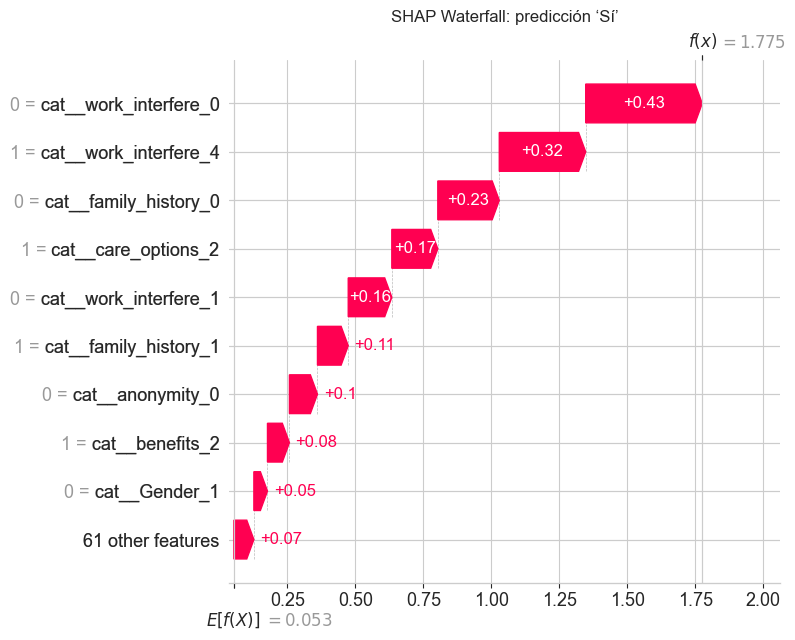

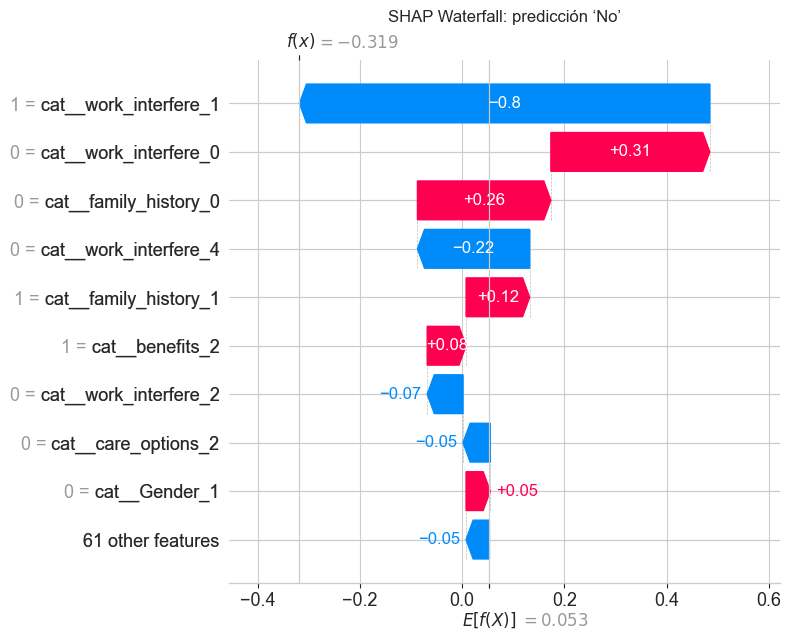

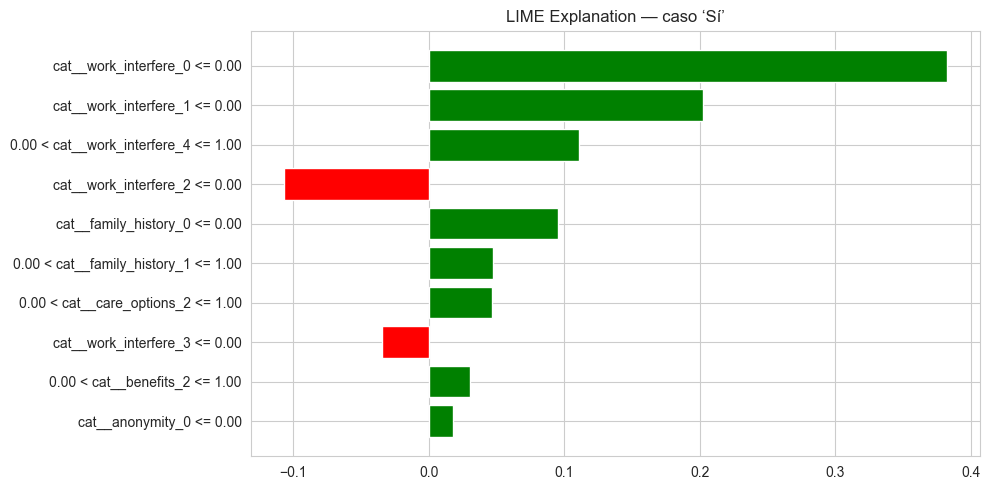

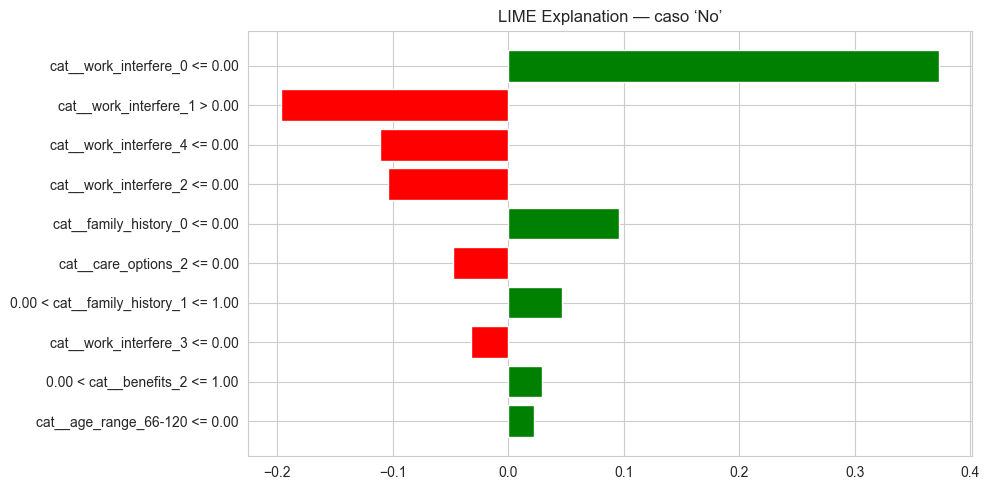

In [23]:
import shap
import numpy as np
from lime.lime_tabular import LimeTabularExplainer
import matplotlib.pyplot as plt

# 1) Elegimos dos instancias: una con y_test = 1 (“Sí”) y otra con y_test = 0 (“No”)
idx_yes = np.where(y_test.values == 1)[0][0]
idx_no  = np.where(y_test.values == 0)[0][0]

# 2) SHAP local: waterfall plots para cada instancia
# (asegúrate de haber calculado shap_values y definido feature_names)

plt.figure(figsize=(6,4))
shap.plots.waterfall(shap_values[idx_yes], max_display=10, show=False)
plt.title("SHAP Waterfall: predicción ‘Sí’")
plt.tight_layout()
plt.show()

plt.figure(figsize=(6,4))
shap.plots.waterfall(shap_values[idx_no], max_display=10, show=False)
plt.title("SHAP Waterfall: predicción ‘No’")
plt.tight_layout()
plt.show()


# 3) LIME local: explicador tabular
explainer_lime = LimeTabularExplainer(
    training_data  = X_train_tr,
    feature_names  = feature_names,
    class_names    = ['No', 'Yes'],
    mode           = 'classification'
)

# 4) Creamos explicación para cada caso
exp_yes = explainer_lime.explain_instance(
    X_test_tr[idx_yes],
    best_xgb.named_steps['clf'].predict_proba,
    num_features=10
)

exp_no = explainer_lime.explain_instance(
    X_test_tr[idx_no],
    best_xgb.named_steps['clf'].predict_proba,
    num_features=10
)

# 5) Visualizamos las explicaciones LIME
fig_yes = exp_yes.as_pyplot_figure(label=1)
plt.title("LIME Explanation — caso ‘Sí’")
plt.tight_layout()
plt.show()

fig_no = exp_no.as_pyplot_figure(label=1)
plt.title("LIME Explanation — caso ‘No’")
plt.tight_layout()
plt.show()

En los ejemplos analizados hemos obtenido cuatro visualizaciones que permiten entender por qué el modelo XGBoost clasifica ciertos casos como “Sí” (tratamiento) o “No”:

1. **SHAP Waterfall — caso “Sí”**  
   - Parte de un valor base (E[f(X)] ≈ 0.05) y muestra cómo cada feature “empuja” la predicción hacia f(x) ≈ 1.78.  
   - Las tres categorías de `work_interfere` (0, 4 y 1) aportan los mayores incrementos (+0.43, +0.32, +0.23), seguidas por `family_history_0` y `care_options_2`.  
   - Concluye que, en este individuo, tanto la interferencia en el trabajo (baja y alta) como el historial familiar explican el alto score de “Sí”.

2. **SHAP Waterfall — caso “No”**  
   - Parte del mismo valor base y desciende a f(x) ≈ –0.32.  
   - `work_interfere_1` ejerce el mayor empujón negativo (–0.80), dominando la predicción hacia “No”.  
   - Aunque otras features (p. ej. `work_interfere_0`) intentan subir la probabilidad, no superan el fuerte efecto de la categoría “1”.

3. **LIME — caso “Sí”**  
   - Muestra en barras verdes (+) las features que localmente elevan la probabilidad de “Sí” y en rojas (–) las que la reducen.  
   - Coincide con SHAP: `work_interfere_0` y `work_interfere_1` son los dos primeros impulsores positivos, seguidos de `work_interfere_4` y luego `family_history_0`.

4. **LIME — caso “No”**  
   - Destaca en verde que la ausencia de interferencia (`work_interfere_0`) favorece el “No”, y en rojo que `work_interfere_1`, `work_interfere_4` y `work_interfere_2` lo penalizan.  
   - También `family_history_0` aparece empujando hacia “No”, como vimos con SHAP.

**Conclusión común:**  
Tanto SHAP como LIME identifican de forma consistente que las distintas categorías de la variable `work_interfere` (interferencia de la salud mental en el trabajo) —y en segundo lugar `family_history`— son las principales responsables de las predicciones locales, ya sea hacia “Sí” o hacia “No”. Esto confirma la validez de nuestro EDA inicial y ofrece una explicación clara, transparente y reutilizable para cada caso individual.  








## 5.7 Comparativa final y conclusiones

### Comparativa de rendimiento






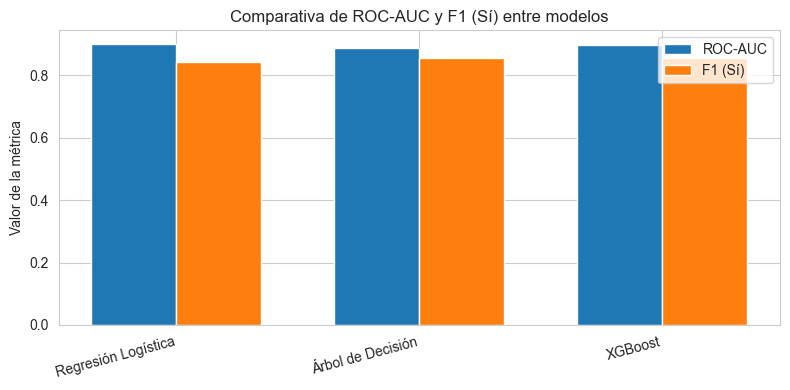

In [24]:
# 1) Creamos un DataFrame con los resultados
metrics = pd.DataFrame({
    'Modelo': ['Regresión Logística', 'Árbol de Decisión', 'XGBoost'],
    'ROC-AUC': [0.899, 0.888, 0.898],
    'F1 (Sí)': [0.842, 0.855, 0.856]
})

# 2) Configuración del gráfico
labels = metrics['Modelo']
x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots(figsize=(8,4))
ax.bar(x - width/2, metrics['ROC-AUC'], width, label='ROC-AUC')
ax.bar(x + width/2, metrics['F1 (Sí)'], width, label='F1 (Sí)')

# 3) Etiquetas y leyenda
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=15, ha='right')
ax.set_ylabel('Valor de la métrica')
ax.set_title('Comparativa de ROC-AUC y F1 (Sí) entre modelos')
ax.legend()

plt.tight_layout()
plt.show()

### Discusión de modelos



- **Regresión Logística**  
  - Mantiene un **ROC-AUC ≈ 0.90** y **F1 (Sí) ≈ 0.84**, lo que confirma su papel de baseline muy sólido.  
  - Su curva de precisión-recall y matriz de confusión mostraron un buen balance entre precision y recall.

- **Árbol de Decisión**  
  - Ligera reducción en ROC-AUC (≈ 0.89) pero mejora el **F1 (Sí) a 0.855**.  
  - Su ventaja interpretativa (reglas “if-then” claras) compensa la pequeña pérdida en AUC.

- **XGBoost**  
  - Iguala al baseline en **ROC-AUC ≈ 0.90** y alcanza el **F1 (Sí) más alto (≈ 0.856)**.  
  - Captura interacciones no lineales, aunque requiere XAI post-hoc para mantener la transparencia.

### Coherencia con EDA y XAI

Los hallazgos del EDA (correlaciones y crosstabs) y los análisis globales y locales de SHAP/LIME coinciden en que **`work_interfere`** y **`family_history`** son las variables más influyentes. Esta alineación entre exploración de datos y explicabilidad fortalece la confianza en nuestros modelos.

### Líneas de mejora y siguientes pasos

1. **Ingeniería de features**: crear variables combinadas o contrafácticas (por ejemplo, interacción `work_interfere × benefits`).  
2. **Ensamblado de modelos**: combinar regresión logística y XGBoost para ganar robustez.  
3. **Afinado de hiperparámetros**: explorar optimizaciones más finas o técnicas bayesianas.  
4. **Recolección de datos**: aumentar muestra de grupos menos representados (género “trans”, franjas de edad extremas).  
5. **Validación externa**: probar el pipeline en otro dataset real de salud mental para evaluar generalización.

Con esta comparativa, concluimos que es posible alcanzar un alto rendimiento predictivo sin renunciar a la **transparencia** y la **explicabilidad**, aspectos fundamentales en contextos tan sensibles como la salud mental.  


## 6. Conclusiones y siguientes pasos

### 6.1 Conclusiones generales  
- El EDA reveló que variables como **`work_interfere`** y **`family_history`** mantienen una fuerte asociación con la búsqueda o recepción de tratamiento (correlaciones de ~0.60 y ~0.38, respectivamente).  
- El **baseline** de Regresión Logística ya alcanzó un **ROC-AUC ≈ 0.90**, lo que muestra que un modelo lineal sencillo capta gran parte de la señal del dataset.  
- El **Árbol de Decisión** aportó trazabilidad y elevó ligeramente el **F1 (Sí)** hasta 0.855, sin perder apenas AUC (≈0.89).  
- **XGBoost**, a pesar de su complejidad, no superó sustancialmente al baseline (ROC-AUC ≈ 0.90 y F1 (Sí) ≈ 0.856), pero sí demostró estabilidad en la detección de la clase minoritaria.  
- Las explicaciones globales (SHAP) y locales (SHAP + LIME) confirmaron que, tanto a nivel agregado como por individuo, las diferentes categorías de `work_interfere` y `family_history` son los principales impulsores de la decisión del modelo.

### 6.2 Limitaciones  
- El dataset, aunque equilibrado en la variable objetivo, proviene de una encuesta autoinformada en entornos tecnológicos, lo que puede introducir **sesgos de selección** y **subjetividad**.  
- No se realizó validación externa en un segundo dataset ni análisis temporal, por lo que la **generalización** de los resultados queda pendiente de confirmar.  
- La pipeline actual usa **one-hot encoding** para todas las categorías; en algunos casos podría explorarse **embeddings** o codificaciones ordinales más sofisticadas.

### 6.3 Propuestas de mejora  
1. **Ingeniería de nuevas variables** (interacciones, contrafácticos) para capturar relaciones no lineales explícitas.  
2. **Ensamblados y stacking** de modelos diversos (p. ej., combinación de regresión logística y XGBoost) para mejorar la robustez.  
3. **Optimización bayesiana** de hiperparámetros para explorar espacios más amplios y precisos.  
4. **Recolección de datos adicional** de colectivos subrepresentados (género “trans”, franjas de edad extremas) y validación en entornos clínicos reales.  
5. **Implementación de XAI contrafáctica** para ofrecer recomendaciones del tipo “qué cambiar para pasar de ‘No’ a ‘Sí’” en cada individuo.

---

### Referencias bibliográficas

1. Aziz, N. A., Manzoor, A., Qureshi, M. D. M., Qureshi, M. A., & Rashwan, W. (2024). *Unveiling Explainable AI in Healthcare: Current Trends, Challenges, and Future Directions* [Preprint]. *medRxiv*. https://doi.org/10.1101/2024.08.10.24311735

2. Adeniran, A. A., Onebunne, A. P., & William, P. (2024). *Explainable AI (XAI) in healthcare: Enhancing trust and transparency in critical decision-making*. *World Journal of Advanced Research and Reviews, 23*(3), 2647–2658. https://doi.org/10.30574/wjarr.2024.23.3.2936

3. Kaggle. (s.f.). *Mental Health in Tech Survey*. Recuperado de  
   https://www.kaggle.com/datasets/osmi/mental-health-in-tech-survey  
